# Master Thesis (Electricity Trading on Intraday Market in Japan)

## 節立てのしかた
### 小技集(時系列データ用)
https://naotaka1128.hatenadiary.jp/entry/pandas-start-guide#%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A7%E3%82%88%E3%81%8F%E4%BD%BF%E3%81%86%E5%87%A6%E7%90%86

# Problem

- An increase in the proportion for the renewable energy power plant in German electricity industry.<p>
- Predicting the amount of electricity supply is becoming more difficult<p>
- The trading volume on the intraday market in Germany is also increasing. <p>
    --> The difference of the planned and the actual electricity supply is expanded. <p>
- The trading price of intraday market tends to be volatile.<p> 
- The electricity suppliers, including producers and retailers, suffered from an unevitable risk due to the uncertainty after submitting day-ahead plan.<p>

# Purpose of this analysis

- Interpreting the dataset of electricity trading.<p>
- Seeking useful features for the prediction. <p>
- Seeking more efficient prediction model for intraday Half Hourly(QH) trading price.<p>
    Intradayのclose priceを予測する！！<p>
    --> Comparision of the performance of some prediction models such as Linear, Non-linear.<p>
- Seeking better trading strategy to maximise return and minimise the risk<p>
    --> Measuring the return with Sharp ratio and the risk with Value at risk

## To do (優先順)

※4.6  需要電力計　＋　電源別発電量(東北電力サイトより)_2020_12月未入手 <P>
    Date leaking整理 <p>
    lag features (Data leakingを調整のみ、seasonality確認後に再度調整) <p>
    modelにprophetとARIMAを追加 <p>
    その後 EDA <p>

# Read & interpret dataset

Loading some datasets <p>
Confirming and interpreting it <p>
Preprocessing missing values and outliers on the datasets

In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## JEPX_Spot_datasets
http://www.jepx.org/market/index.html

To do<P>
    seasonality, stationality(以下git-hub講義資料参照) <p>
    https://github.com/mloning/intro-to-ml-with-time-series-DSSGx-2020/blob/master/notebooks/02_exploratory_data_analysis.ipynb <p>
    https://github.com/juanitorduz/btsa/blob/master/python/fundamentals/notebooks/eda_part_2_correlations.ipynb

In [4]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Spot_dataset
df_spot_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2016.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2017.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2018.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2019.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2020.csv', sep=',', header=0, encoding='shift_jis')

In [145]:
df_spot_2020.head()

,年月日,時刻コード,売り入札量(kWh),買い入札量(kWh),約定総量(kWh),システムプライス(円/kWh),エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),エリアプライス北陸(円/kWh),エリアプライス関西(円/kWh),エリアプライス中国(円/kWh),エリアプライス四国(円/kWh),エリアプライス九州(円/kWh),Unnamed: 15,スポット・時間前平均価格(円/kWh),α上限値×スポット・時間前平均価格(円/kWh),α下限値×スポット・時間前平均価格(円/kWh),α速報値×スポット・時間前平均価格(円/kWh),α確報値×スポット・時間前平均価格(円/kWh),Unnamed: 21,回避可能原価全国値(円/kWh),回避可能原価北海道(円/kWh),回避可能原価東北(円/kWh),回避可能原価東京(円/kWh),回避可能原価中部(円/kWh),回避可能原価北陸(円/kWh),回避可能原価関西(円/kWh),回避可能原価中国(円/kWh),回避可能原価四国(円/kWh),回避可能原価九州(円/kWh)
0,2020/04/01,1,16592450,18033600,15772950,6.43,6.84,6.76,6.76,4.00,4.00,4.00,4.00,4.00,4.00,NaN,6.43,503.53,1.71,2.07,4.43,NaN,6.43,6.84,6.77,6.76,4.03,4.00,4.00,4.00,4.00,4.00
1,2020/04/01,2,16986950,18180600,15766550,5.77,6.62,6.62,6.62,3.73,3.73,3.73,3.73,3.73,3.73,NaN,5.77,504.38,1.71,2.70,4.21,NaN,5.77,6.63,6.63,6.62,3.75,3.73,3.73,3.73,3.73,3.73
2,2020/04/01,3,17263950,18234450,15990350,5.18,6.61,6.61,6.61,4.09,4.09,4.09,4.09,4.09,4.09,NaN,5.19,505.36,1.71,2.38,4.22,NaN,5.19,6.64,6.61,6.61,4.10,4.09,4.09,4.09,4.09,4.09
3,2020/04/01,4,17583250,18565050,16078100,4.87,6.51,6.51,6.51,4.04,4.04,4.04,4.04,4.04,4.04,NaN,4.87,503.52,1.68,2.38,4.34,NaN,4.87,6.52,6.51,6.51,4.05,4.04,4.04,4.04,4.04,4.04
4,2020/04/01,5,17943550,18738950,16338200,4.87,6.51,6.51,6.51,4.09,4.09,4.09,4.09,4.09,4.09,NaN,4.87,503.52,1.68,1.68,4.10,NaN,4.87,6.52,6.51,6.51,4.10,4.09,4.09,4.09,4.09,4.09


In [6]:
# marge all the spot datasets
df_spot = pd.concat([df_spot_2016, df_spot_2017])
df_spot = pd.concat([df_spot, df_spot_2018])
df_spot = pd.concat([df_spot, df_spot_2019])
df_spot = pd.concat([df_spot, df_spot_2020])

At first pick up only spot price. BUT need to analyse also others

In [7]:
# Pick up some columns
df_spot = df_spot.drop(['エリアプライス北海道(円/kWh)', 'エリアプライス中部(円/kWh)', 'エリアプライス北陸(円/kWh)',
       'エリアプライス関西(円/kWh)', 'エリアプライス中国(円/kWh)', 'エリアプライス四国(円/kWh)',
       'エリアプライス九州(円/kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

In [8]:
# Rename them
df_spot = df_spot.rename(columns={'年月日': 'Date', '時刻コード': 'HH', '売り入札量(kWh)': 'Sell_volume(kWh)',
                                  '買い入札量(kWh)': 'Buy_volume(kWh)', '約定総量(kWh)': 'Total_volume(kWh)', 'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)','エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)'})

In [9]:
# Apply to_datetime
df_spot["Date"] = pd.to_datetime(df_spot["Date"]).dt.date

In [10]:
df_spot.head()

,Date,HH,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh)
0,2016-04-01,1,5077000,2120500,675500,6.61,6.69,6.69
1,2016-04-01,2,5621500,2239000,755500,6.34,6.34,6.34
2,2016-04-01,3,5710500,2219000,713500,6.34,6.34,6.34
3,2016-04-01,4,5536000,2202500,717500,6.25,6.03,6.03
4,2016-04-01,5,5461000,2192000,870500,6.57,6.57,6.57


In [11]:
spotprice = df_spot
spotprice = spotprice.set_index(["Date", "HH"])

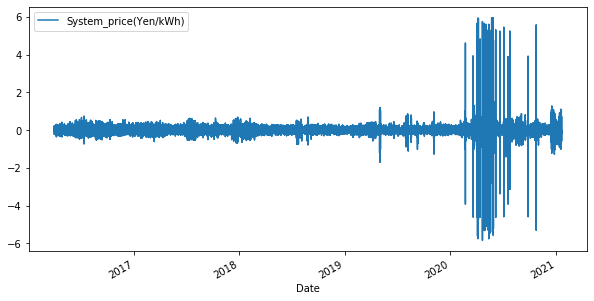

In [12]:
# Plot logarithmic return (対数リターン)下落率と上昇率を同等に扱う 
p = spotprice[["System_price(Yen/kWh)"]]
rets_spot = np.log(p / p.shift(1))
rets_spot.reset_index(inplace = True)
rets_spot.drop("HH", axis=1, inplace=True)
rets_spot = rets_spot.set_index("Date")
rets_spot.dropna(inplace=True)

rets_spot.plot(subplots=True, figsize=(10, 5));

y軸の名前・単位を追加する！！

In [13]:
rets_spot.describe()

,System_price(Yen/kWh)
count,84335.000000
mean,0.000025
std,0.177481
min,-5.840642
25%,-0.026941
50%,0.000000
75%,0.021851
max,5.953243


- Multiindexを用いた行列調整　https://note.nkmk.me/python-pandas-multiindex-set-reset-sort-swap/

- (参考)　- stack()を用いた列→行への変換方法
https://deepage.net/features/pandas-stack-unstack.html

- pivot_tableの使い方 (stack, unstackも含む)
https://note.nkmk.me/python-pandas-stack-unstack-pivot/

## JEPX_Intra_datasets
http://www.jepx.org/market/index.html

In [3]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Intra_dataset
df_intra_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2016.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2017.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2018.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2019.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2020.csv', sep=',', header=0, encoding='shift_jis')

In [4]:
# marge all the intra datasets
df_intra = pd.concat([df_intra_2016, df_intra_2017])
df_intra = pd.concat([df_intra, df_intra_2018])
df_intra = pd.concat([df_intra, df_intra_2019])
df_intra = pd.concat([df_intra, df_intra_2020])

In [5]:
df_intra = df_intra.rename(columns={'年月日': 'Date', 
                                    '時刻コード': 'HH',
                                    '始値（円/kWh）': 'Open',
                                    '高値（円/kWh）': 'High',
                                    '安値（円/kWh）': 'Low',
                                    '終値（円/kWh）': 'Close',
                                    '平均（円/kWh）': 'Average',
                                    '約定量合計（MWh/h）': 'Volume(MWh/h)',
                                    '約定件数': 'Volume(Tick count)'})

In [6]:
# Apply to_datetime
df_intra["Date"] = pd.to_datetime(df_intra["Date"])

In [361]:
df_intra.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.7,1
1,2016-04-01,2,NaN,NaN,NaN,NaN,NaN,0.0,0
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.8,1
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.8,1
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.8,1


### Price volatility

Reference
https://github.com/mloning/intro-to-ml-with-time-series-DSSGx-2020/blob/master/notebooks/02_exploratory_data_analysis.ipynb

Try to look at the over all transition of close price from 2016 to 2020

--> Confirm whether it has seasonality or trend.

In [7]:
close_price = df_intra[df_intra['Date'] <= '2020-12-31']
close_price.tail()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
13195,2020-12-31,44,35.0,70.0,33.00,70.00,44.71,328.7,110
13196,2020-12-31,45,42.0,70.0,41.01,45.48,50.19,409.9,104
13197,2020-12-31,46,42.0,70.0,35.00,41.33,42.20,383.2,112
13198,2020-12-31,47,37.0,70.0,33.93,36.66,44.09,345.9,60
13199,2020-12-31,48,27.0,37.5,23.93,26.46,28.42,233.3,66


In [8]:
close_price = df_intra[df_intra['Date'] <= '2020-12-31']
close_price = close_price[['Date', 'HH', 'Close']]
close_price.head()

,Date,HH,Close
0,2016-04-01,1,7.69
1,2016-04-01,2,NaN
2,2016-04-01,3,7.21
3,2016-04-01,4,7.06
4,2016-04-01,5,7.21


In [9]:
close_price.interpolate(method='linear', inplace=True)

In [10]:
print(close_price.isnull().sum())

Date     0
HH       0
Close    0
dtype: int64


※ Half Hourly time slot

時間の切上げ切り捨てについて
https://www.deep-rain.com/programming/python/1355#i-4

In [177]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = HH_table['Time'].str[-8:]
# HH_table['Hourly_Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').floor("H").strftime('%H:%M')
# HH_table['Hourly_Time'] = pd.to_datetime(HH_table['Hourly_Time']).dt.time

HH_table.head()

,HH,Time
0,1,00:00
1,2,00:30
2,3,01:00
3,4,01:30
4,5,02:00


In [186]:
close_price_graph = close_price
close_price_graph = pd.merge(close_price_graph, HH_table, how="left", on=['HH'])
close_price_graph["Date"] = close_price_graph["Date"].astype(str)
close_price_graph["DateTime"] = pd.to_datetime(close_price_graph["Date"] + " " + close_price_graph["Time"], format='%Y-%m-%d %H:%M')
close_price_graph = close_price_graph.drop(["Date", "index", "HH", "Time"], axis=1)

In [187]:
close_price_graph.head()

,Close,DateTime
0,7.69,2016-04-01 00:00:00
1,7.45,2016-04-01 00:30:00
2,7.21,2016-04-01 01:00:00
3,7.06,2016-04-01 01:30:00
4,7.21,2016-04-01 02:00:00


In [189]:
close_price_graph.set_index("DateTime", inplace=True)

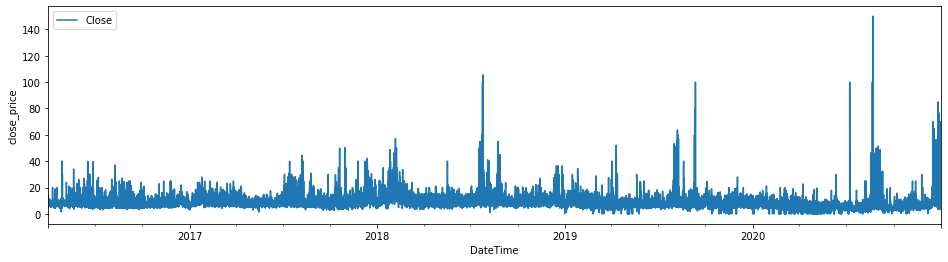

In [190]:
# Simple plot
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph.plot(ax=ax)

ax.set(ylabel="close_price", xlabel="DateTime");

Can not observe a kind of trend but some seasonality. 

[Stationarity]
Test Stationarity

In [382]:
# 自己相関のコレログラム
import statsmodels.api as sm

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(close_price_graph, lags=40, ax=ax1)

ImportError: cannot import name 'to_numpy' from 'statsmodels.compat.pandas' (/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py)

In [ ]:
# 偏自己相関のコレログラム
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

In [ ]:
# データをトレンドと季節成分に分解
seasonal_decompose_res = sm.tsa.seasonal_decompose(data.values, freq=12)
seasonal_decompose_res.plot()

In [ ]:
# トレンド項あり(2次まで)、定数項あり
ctt  = sm.tsa.stattools.adfuller(data, regression="ctt")
# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(data, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(data, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(data, regression="nc")

print("ctt:")
print(ctt)
print("---------------------------------------------------------------------------------------------------------------")
print("ct:")
print(ct)
print("---------------------------------------------------------------------------------------------------------------")
print("c:")
print(c)
print("---------------------------------------------------------------------------------------------------------------")
print("nc:")
print(nc)
print("---------------------------------------------------------------------------------------------------------------")

[Seasonality]

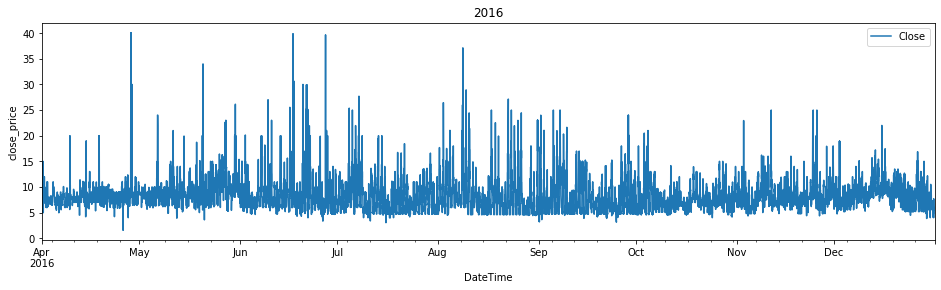

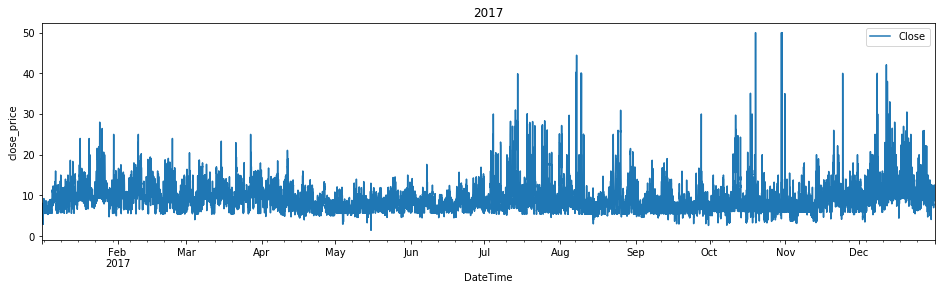

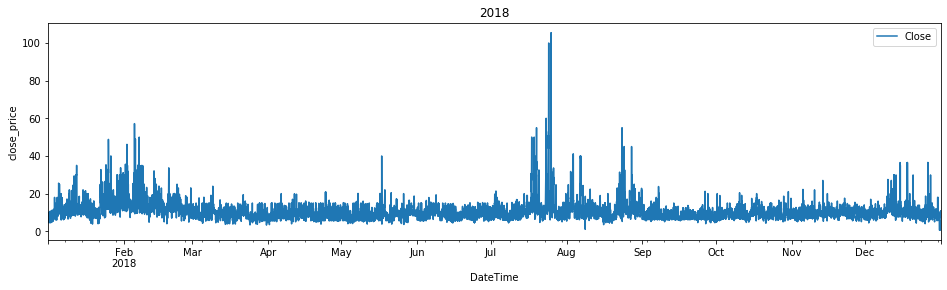

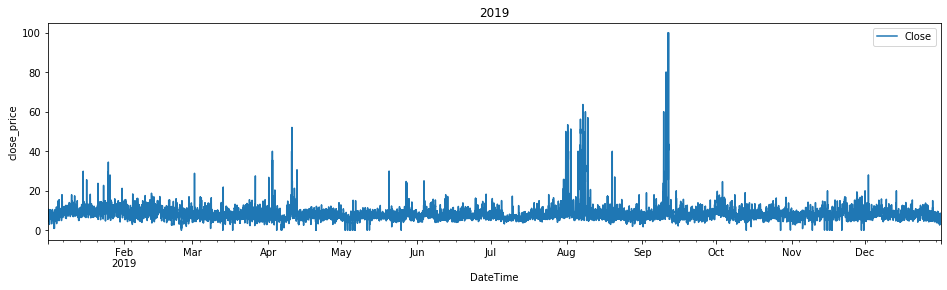

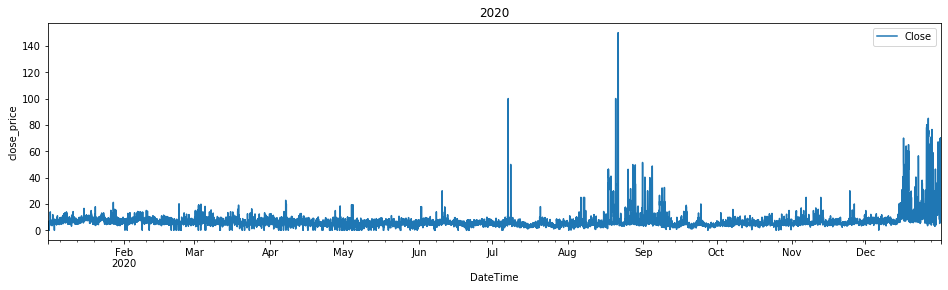

In [226]:
#  Plot close price for a year

years = [2016, 2017, 2018, 2019, 2020]

for year in years:
    start = str(year) + "-01-01 00:00:00"
    end = str(year) + "-12-31 23:30:00"
    close_price_graph_y = close_price_graph[np.logical_and(start < close_price_graph.index, close_price_graph.index <= end)]

    fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
    close_price_graph_y.plot(ax=ax)
    ax.set(title=year, ylabel="close_price", xlabel="DateTime");

Can obsearve price spices which tend to be happend from Augast to September, especially since 2018

Let's try to see one more detailed trends to see weekly seasonality.

In [303]:
# Make the table for pivot
close_price_graph_table = close_price_graph
close_price_graph_table["Year"] = close_price_graph_table.index.year
close_price_graph_table["Month"] = close_price_graph_table.index.month
close_price_graph_table["Day"] = close_price_graph_table.index.day
close_price_graph_table["Time"] = close_price_graph_table.index.time
close_price_graph_table = close_price_graph_table.reset_index()
close_price_graph_table = close_price_graph_table.drop("DateTime", axis=1)
close_price_graph_table.head()

,Close,Year,Month,Day,Time
DateTime,,,,,
2016-04-01 00:00:00,7.69,2016,4,1,00:00:00
2016-04-01 00:30:00,7.45,2016,4,1,00:30:00
2016-04-01 01:00:00,7.21,2016,4,1,01:00:00
2016-04-01 01:30:00,7.06,2016,4,1,01:30:00
2016-04-01 02:00:00,7.21,2016,4,1,02:00:00


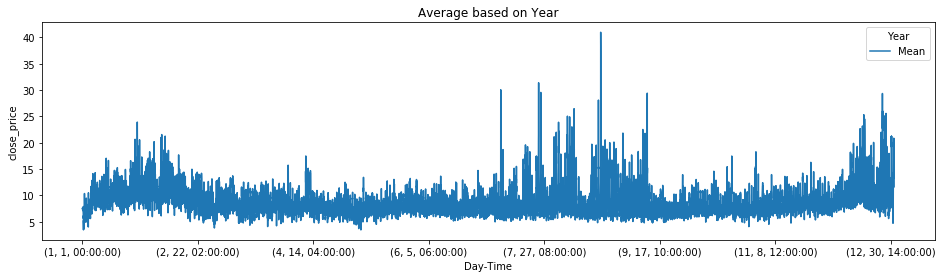

In [321]:
# Plot Average close price for each time slot based on Year
close_price_graph_table_yearly = pd.DataFrame(close_price_graph_table.pivot(index=['Month', 'Day', 'Time'], columns='Year', values='Close'))
year_col = close_price_graph_table_yearly.loc[: , "2016":"2020"]
close_price_graph_table_yearly["Mean"] = year_col.mean(axis=1)
close_price_graph_table_yearly = close_price_graph_table_yearly.drop(years, axis=1)

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_yearly.plot(ax=ax)
ax.set(title="Average based on Year", ylabel="close_price", xlabel="Day-Time");

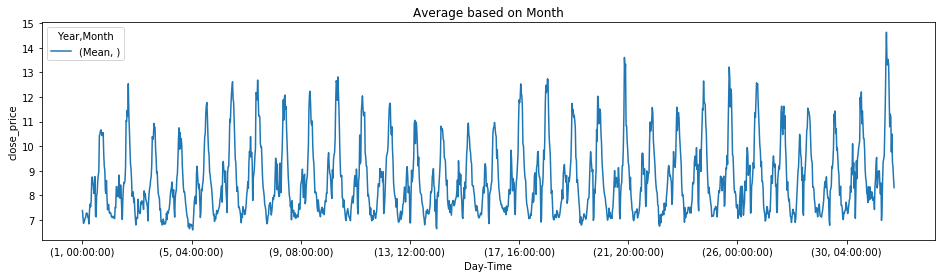

In [320]:
# Plot Average close price for each time slot based on Month
close_price_graph_table_monthly = pd.DataFrame(close_price_graph_table.pivot(index=['Day', 'Time'], columns=['Year', 'Month'], values='Close'))
month_col = close_price_graph_table_monthly.loc[: , :]
close_price_graph_table_monthly["Mean"] = month_col.mean(axis=1)
month_col = month_col.drop("Mean", axis=1)
close_price_graph_table_monthly = close_price_graph_table_monthly.drop(month_col, axis=1)

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_monthly.plot(ax=ax)
ax.set(title="Average based on Month", ylabel="close_price", xlabel="Day-Time");

Daily seasonality can be seen here (There are 31 waves once a month)

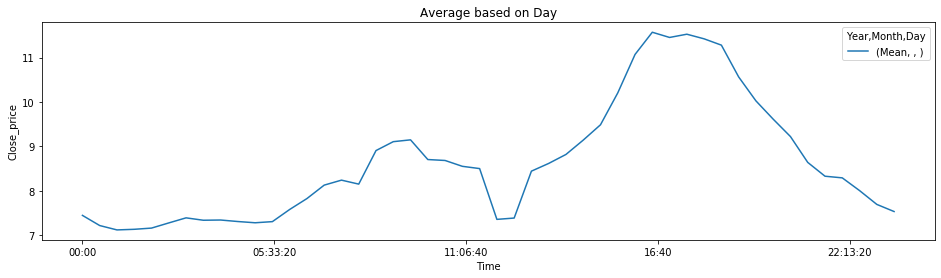

In [360]:
# Plot Average close price for each time slot based on Days(Looking at weekly seasonality)
import matplotlib.ticker as plticker
import matplotlib as mpl

close_price_graph_table_daily = pd.DataFrame(close_price_graph_table.pivot(index=['Time'], columns=['Year', 'Month', 'Day'], values='Close'))
day_col = close_price_graph_table_daily.loc[: , :]
close_price_graph_table_daily["Mean"] = day_col.mean(axis=1)
day_col = day_col.drop("Mean", axis=1)
close_price_graph_table_daily = close_price_graph_table_daily.drop(month_col, axis=1)

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_daily.plot(ax=ax)

ax.set(title="Average based on Day", ylabel="Close_price", xlabel="Time");

Regarding daily seasonality, the close price tend to be high 

※グラフのX軸はいずれ修正！！

In [13]:
close_price.reset_index(inplace=True)

In [14]:
close_HH_table = pd.DataFrame(close_price.pivot(index='Date', columns='HH', values='Close'))

In [108]:
col = close_HH_table.loc[: , 0:48]

In [111]:
col.head()

HH,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01,7.690000,7.450000,7.210000,7.060000,7.210000,7.210000,7.210000,7.210000,7.06,7.060000,7.210000,7.290000,7.670000,7.670000,7.920000,7.92,5.00,15.000000,9.000000,11.000000,5.000000,5.000000,8.000000,8.00,8.00,8.00,8.00,8.00,8.18,8.01,8.00,8.00,8.00,11.04,8.00,8.00,12.000,12.00,8.500,8.50,8.50,8.50,10.00,8.09,7.99000,8.1400,8.14000,8.160
2016-04-02,7.500000,6.780000,6.938571,7.097143,7.255714,7.414286,7.572857,7.731429,7.89,8.048571,8.207143,8.365714,8.524286,8.682857,8.841429,9.00,6.00,7.000000,7.720000,6.000000,6.000000,6.000000,6.000000,6.00,6.00,6.00,6.00,6.00,6.00,9.00,6.00,11.00,7.72,7.72,8.00,11.00,8.000,8.05,7.710,7.71,8.00,6.55,6.16,6.30,6.40000,6.4500,6.44000,6.400
2016-04-03,6.506667,6.613333,6.720000,6.826667,6.933333,7.040000,7.146667,7.253333,7.36,7.466667,7.573333,7.680000,7.786667,7.893333,8.000000,8.00,8.00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00,6.63,6.63,6.63,6.63,7.00,7.00,6.84,6.84,6.84,6.84,6.84,6.84,8.290,8.29,8.290,8.29,7.29,6.84,8.00,6.54,6.53125,6.5225,6.51375,6.505
2016-04-04,6.496250,6.487500,6.478750,6.470000,6.465000,6.460000,6.510000,6.520000,6.54,6.510000,6.600000,6.520000,6.560000,8.120000,8.120000,8.12,8.12,8.531429,8.942857,9.354286,9.765714,10.177143,10.588571,11.00,8.50,8.50,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,9.625,9.25,8.875,8.50,8.50,8.00,7.50,7.00,7.00000,7.0000,7.00000,7.000
2016-04-05,7.000000,7.000000,7.000000,7.000000,7.000000,6.430000,6.480000,6.520000,6.51,6.530000,6.460000,7.260000,7.506667,7.753333,8.000000,8.00,6.49,6.230000,5.910000,6.080000,7.000000,7.000000,7.000000,5.46,6.40,6.40,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,8.63,9.000,8.90,8.000,7.83,8.00,8.00,8.50,8.00,6.46000,6.4300,7.00000,7.000


In [112]:
close_HH_table["mean"] = col.mean(axis=1)

In [113]:
close_HH_table.tail()

HH,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,mean
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-27,20.79,17.00,14.90,14.90,14.90,14.90,14.90,14.90,5.00,7.27,7.29,7.93,14.90,20.79,50.00,49.00,17.31,14.90,14.81,14.90,14.90,14.90,5.25,15.00,7.23,15.10,20.00,20.00,14.90,21.00,19.30,25.20,14.90,14.90,18.00,18.00,20.00,38.58,38.56,70.65,68.57,50.00,39.77,33.49,29.22,25.82,14.90,21.00,22.092292
2020-12-28,9.58,4.00,4.18,4.18,4.29,4.29,17.45,14.90,14.90,14.90,14.90,14.90,33.74,37.90,61.29,76.50,75.00,75.10,75.10,60.01,44.93,30.00,23.38,14.90,10.00,9.90,7.12,6.22,14.82,7.00,28.23,30.49,23.51,58.99,29.97,30.00,16.20,35.09,29.97,14.90,30.09,25.09,14.81,14.90,9.24,13.51,14.88,12.51,25.370000
2020-12-29,5.49,4.00,10.01,14.90,14.90,14.90,13.82,14.01,13.90,13.87,13.60,14.90,17.00,15.19,26.64,29.64,18.98,15.07,14.90,14.90,9.55,7.41,3.77,3.31,3.77,3.14,7.15,7.53,8.18,9.64,9.38,12.77,15.80,34.57,37.48,46.46,34.04,35.00,29.59,28.42,33.20,30.51,33.20,14.90,9.90,29.82,4.05,4.18,16.819583
2020-12-30,16.98,16.28,16.04,15.99,18.62,18.62,18.62,15.10,15.07,15.00,15.94,15.80,16.37,16.76,24.90,29.90,34.90,35.90,28.46,22.39,19.97,19.97,16.66,15.52,15.83,14.06,11.40,17.84,14.00,15.00,16.00,19.00,24.30,35.00,39.00,64.58,39.16,65.57,63.90,63.90,67.11,61.31,50.10,30.00,30.00,29.00,34.21,26.79,27.642083
2020-12-31,35.00,35.00,35.00,35.00,25.00,19.12,25.01,25.01,25.01,25.01,25.00,19.12,37.00,30.76,42.00,36.94,30.04,16.20,14.90,8.25,23.99,15.83,6.47,5.22,6.39,19.00,10.20,6.19,15.33,15.30,17.49,19.44,31.44,49.90,45.00,60.00,69.99,60.01,35.00,33.00,70.00,70.00,40.00,70.00,45.48,41.33,36.66,26.46,31.031042


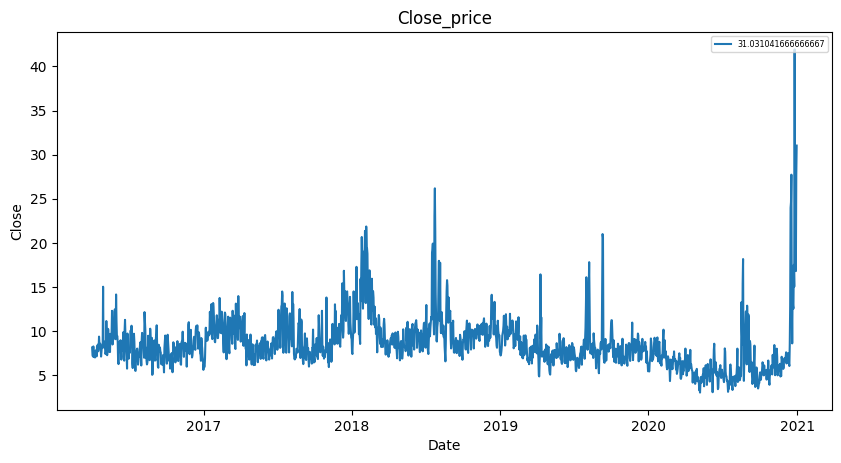

In [124]:
# re-sample based on week(W), month(M), quarter(Q) or year(Y) 
rolling_times = 1
fig = plt.figure(figsize=(10,5),dpi=100)
color = plt.rcParams['axes.prop_cycle'].by_key()['color']

#cols = re_close_HH_table.columns[0:48:4] #[Start: End: interval]

#for col in cols:
plt.plot(close_HH_table["mean"].rolling(rolling_times).mean(), label=col)

plt.title('Close_price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(loc='upper right', fontsize='xx-small')

Too volatiled to see...

In [21]:
close_HH_table.describe()

HH,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
count,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000
mean,7.444437,7.215479,7.116997,7.130832,7.158119,7.274605,7.388853,7.334980,7.340058,7.306103,7.278019,7.303655,7.577723,7.823629,8.126510,8.238796,8.149263,8.905467,9.105877,9.146926,8.703154,8.681986,8.550379,8.499280,7.354654,7.384407,8.441503,8.615639,8.818041,9.140916,9.486987,10.205397,11.071544,11.572033,11.454689,11.527707,11.423534,11.281446,10.565233,10.025334,9.613111,9.220732,8.638790,8.327339,8.290145,8.003648,7.692059,7.531374
std,2.535417,2.358326,2.356395,2.394256,2.465318,2.600815,2.733102,2.127037,2.769729,2.723942,2.552629,2.348957,2.953689,3.384322,4.434317,4.598807,4.040160,4.748047,4.849162,4.733608,4.084984,4.359732,4.256228,4.416546,3.401098,3.639942,4.387907,4.328630,5.027862,4.903101,6.249741,6.769600,7.192414,8.548611,7.876723,7.180106,6.486947,6.248348,5.457270,4.792778,4.465009,3.953533,3.434791,3.375638,3.488606,2.873927,2.897723,2.679569
min,1.000000,1.540000,2.000000,1.540000,0.010000,0.010000,2.120000,2.110000,1.440000,1.000000,2.050000,1.970000,2.270000,0.490000,1.000000,0.770000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.860000,1.900000,1.830000,1.300000,0.830000,0.830000,2.500000,2.500000,2.130000,2.500000,2.500000,2.470000,1.500000,0.670000,2.000000,2.000000
25%,5.830000,5.720000,5.600000,5.617500,5.620000,5.710000,5.907500,5.907500,5.890000,5.940000,5.700000,5.730000,5.817500,5.797500,5.747500,5.907500,5.870000,6.300000,6.287500,6.120000,6.150000,6.100000,5.980000,5.927500,5.350000,5.347500,5.850000,6.017500,5.990000,6.127500,6.147500,6.710000,7.127500,7.710000,7.820000,8.120000,8.300000,8.460000,7.900000,7.877500,7.560000,7.257500,6.800000,6.530000,6.277500,6.180000,5.990000,5.857500
50%,7.225000,7.000000,6.930000,7.000000,7.000000,7.040000,7.150000,7.145000,7.030000,7.035000,7.000000,7.015000,7.170000,7.350000,7.360000,7.410000,7.500000,8.050000,8.270000,8.405000,8.035000,7.980000,7.965000,7.930000,7.000000,7.000000,7.870000,8.000000,8.180000,8.280000,8.390000,9.000000,9.540000,9.920000,10.000000,10.120000,10.105000,10.080000,9.700000,9.440000,9.115000,8.890000,8.300000,8.015000,7.920000,7.730000,7.345000,7.280000
75%,8.792500,8.512500,8.355000,8.370000,8.480000,8.520000,8.670000,8.600000,8.500000,8.420000,8.490000,8.520000,8.922500,9.122500,9.170000,9.390000,9.610000,10.202500,10.642500,10.925000,10.420000,10.500000,10.250000,10.300000,8.982500,8.932500,10.160000,10.300000,10.590000,10.992500,10.940000,11.537500,12.805000,12.842500,12.782500,12.820000,12.670000,12.300000,11.860000,11.092500,10.782500,10.360000,9.800000,9.500000,9.682500,9.292500,9.000000,8.930000
max,35.000000,35.000000,35.000000,35.000000,48.100000,65.110000,78.100000,25.010000,80.100000,75.110000,58.120000,30.000000,60.010000,60.010000,61.290000,76.500000,75.000000,75.100000,75.100000,60.010000,44.930000,50.000000,40.290000,53.430000,40.000000,50.000000,50.000000,49.000000,100.000000,51.170000,100.000000,99.990000,100.000000,150.000000,135.000000,135.000000,70.100000,75.110000,82.000000,85.000000,77.100000,73.000000,76.000000,71.000000,75.600000,41.330000,65.700000,59.220000


See line chart with rollling mean and standard error for some time slots

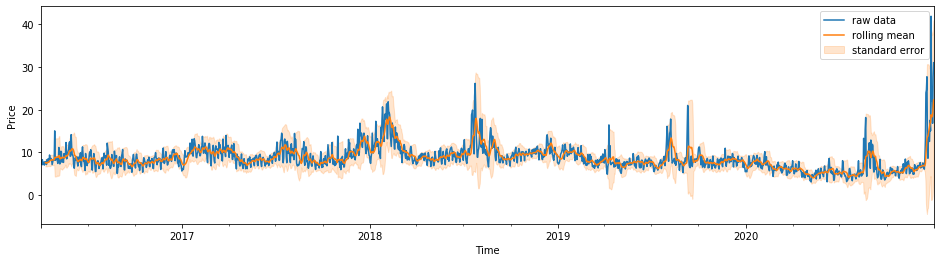

In [119]:
time_slot = 'mean' # 1-48 or 'mean'
window_length = 10 

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_HH_table[time_slot].plot(ax=ax, label="raw data")
yt = close_HH_table[time_slot].rolling(window_length).mean()
yt.plot(ax=ax, label="rolling mean");
rolling_std = close_HH_table[time_slot].rolling(window_length).std()
ax.fill_between(close_HH_table[time_slot].index, yt + (2 * rolling_std), yt - (2 * rolling_std), alpha=0.2, color=u'#ff7f0e', label="standard error")
ax.set(ylabel="Price", xlabel="Time")
plt.legend();

Autocorrelation <p>
See correlatioin between original price and lagged price

In [ ]:
close_HH_table["1"]

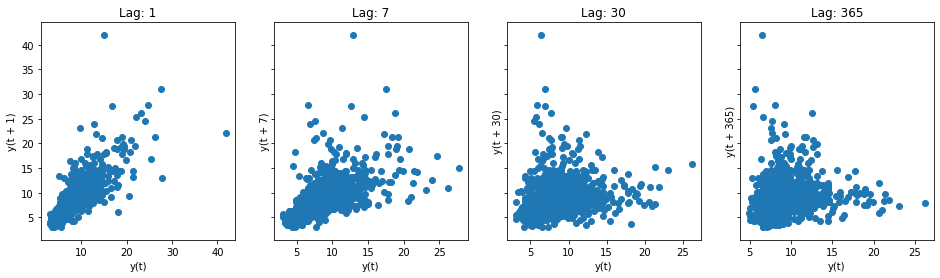

In [120]:
# lag plot daily basis in different time slot
from pandas.plotting import lag_plot
lags = [1, 7, 30, 365]
fig, axs = plt.subplots(ncols=4, figsize=plt.figaspect(.25), sharey=True)
for k, lag in enumerate(lags):
    ax = axs[k]
    lag_plot(close_HH_table['mean'], lag=lag, ax=ax)
    ax.set_title(f"Lag: {lag}")

In [38]:
close_price["index"] = np.trunc(close_price['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

In [40]:
close_price = close_price.drop("date_block_num", axis=1)

In [54]:
close_price_lag = close_price
close_price_lag["index"] = close_price.index
close_price_lag.set_index("index")
close_price_lag = close_price_lag.drop(["Date", "HH"], axis=1)
close_price_lag = close_price_lag[["index", "Close"]]

In [55]:
close_price_lag.head()

,index,Close
0,0,7.69
1,1,7.45
2,2,7.21
3,3,7.06
4,4,7.21


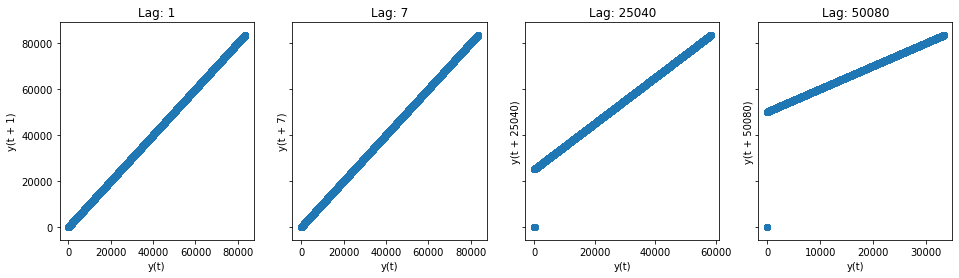

In [65]:
# lag plot HH basis for every close price
from pandas.plotting import lag_plot
lags = [1, 7, 25040, 50080]
fig, axs = plt.subplots(ncols=4, figsize=plt.figaspect(.25), sharey=True)
for k, lag in enumerate(lags):
    ax = axs[k]
    lag_plot(close_price_lag, lag=lag, ax=ax)
    ax.set_title(f"Lag: {lag}")

25040HH --> 2years
50080HH --> 4year

In [61]:
# manual calculation
def compute_autocorr(x, lags=None):
    """
    Estimate autocorrelation for time series x and given lags
    
    References
    ----------
    ..[1] Time-Series Analysis: Forecasting and Control, 4th ed. (Box, Jenkins, Reinsel), p. 31
    """
    
    x = np.asarray(x) 
    n_timepoints = x.shape[0]
    
    mu = x.mean()
    c_0 = np.var(x)  # np.std(x) * np.std(x)
    
    def corrcoef(k):
        """
        Estimate autocorrelation at lag k (sample autocorrelation function).
        """
        return np.sum((x[:-k] - mu) * (x[k:] - mu)) / n_timepoints / c_0
    
    lags = np.arange(1, n_timepoints)
    
    return np.array([1] + [corrcoef(lag) for lag in lags])

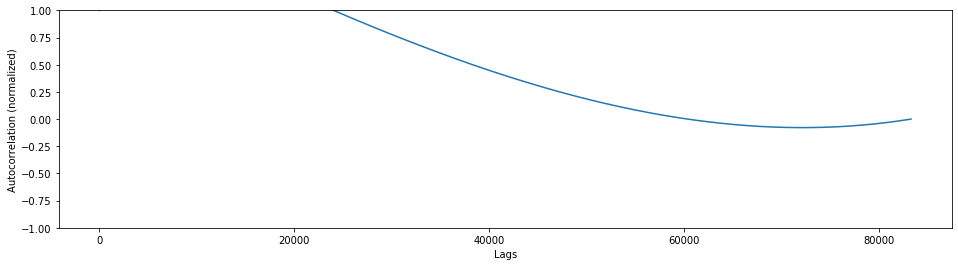

In [62]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
rho = compute_autocorr(close_price_lag)
ax.plot(rho)
ax.set(ylim=(-1, 1), xlabel="Lags", ylabel="Autocorrelation (normalized)");

Trend and Seasonality

In [69]:
!pip3 install sktime

     |████████████████████████████████| 4.3MB 290kB/s eta 0:00:01
     |████████████████████████████████| 9.6MB 501kB/s eta 0:00:01
     |████████████████████████████████| 7.2MB 91kB/s eta 0:00:012
  Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


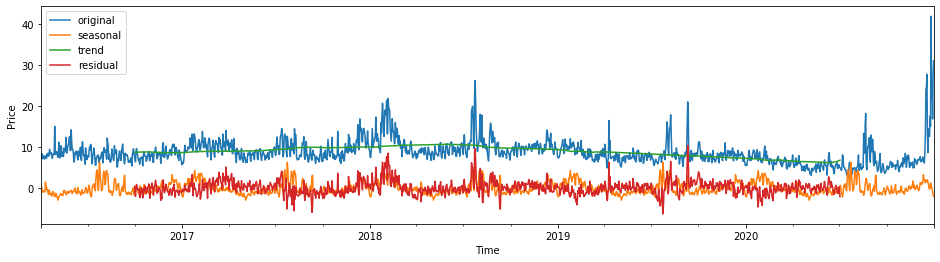

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.datasets import load_airline

time_slot = 'mean' # Choose time slot 1-48 or mean

y = close_HH_table[time_slot]  # daily data
sp = 365  # seasonal periodicity, or periods per year

decomposition = seasonal_decompose(y, model="additive", period=sp)

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
y.plot(ax=ax, label="original")
decomposition.seasonal.plot(ax=ax, label="seasonal")
decomposition.trend.plot(ax=ax, label="trend")
decomposition.resid.plot(ax=ax, label="residual")
ax.set(xlabel="Time", ylabel="Price")
plt.legend();

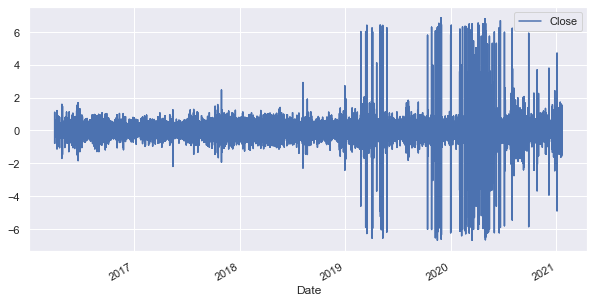

In [224]:
# Plot logarithmic return (対数リターン)下落率と上昇率を同等に扱う 
intraprice = df_intra
intraprice = intraprice.set_index(["Date", "HH"])
intraprice = intraprice[["Close"]]
rets = np.log(intraprice / intraprice.shift(1))
rets.reset_index(inplace = True)
rets.drop("HH", axis=1, inplace=True)
rets = rets.set_index("Date")
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 5));

可能であれば、2019年からなぜボラが上がったのか検証
→再生可能エネルギの総需要に対する比率の推移をみていく

In [27]:
intraprice.describe()

,Close
count,84209.000000
mean,9.553096
std,11.992722
min,0.010000
25%,6.140000
50%,7.990000
75%,10.000000
max,260.310000


### Trading vollume from 2014 to 2019

In [342]:
print(df_intra.isnull().sum())

Date                   0
HH                     0
Open                  72
High                  72
Low                   72
Close                 72
Average               72
Volume(MWh/h)         72
Volume(Tick count)     0
dtype: int64


In [343]:
df_intra["Volume(MWh/h)"].fillna(0, inplace=True)

In [344]:
df_intra.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.7,1
1,2016-04-01,2,NaN,NaN,NaN,NaN,NaN,0.0,0
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.8,1
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.8,1
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.8,1


Mean of the volume on each item

In [345]:
df_intra_HHvol_mean =  df_intra.groupby("HH").agg({"Volume(MWh/h)": 'mean', "Volume(Tick count)": 'mean'}).reset_index()
df_intra_HHvol_mean = df_intra_HHvol_mean.set_index("HH")
df_intra_HHvol_mean.head()

,Volume(MWh/h),Volume(Tick count)
HH,,
1,155.934909,46.953303
2,158.440547,46.451595
3,155.112813,45.703303
4,158.398519,45.483485
5,166.506777,46.639522


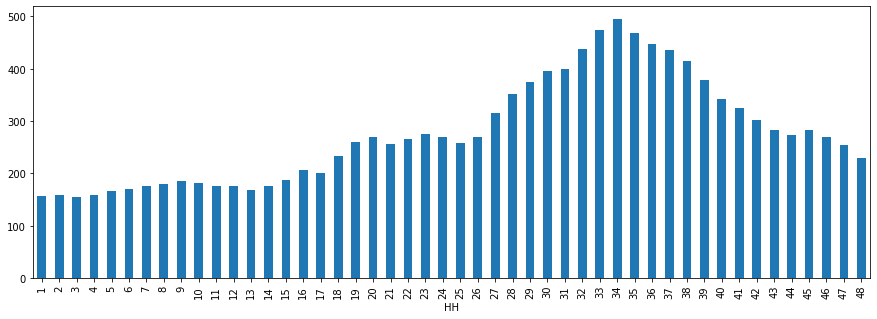

In [346]:
df_intra_HHvol_mean["Volume(MWh/h)"].plot.bar(figsize=(15, 5));

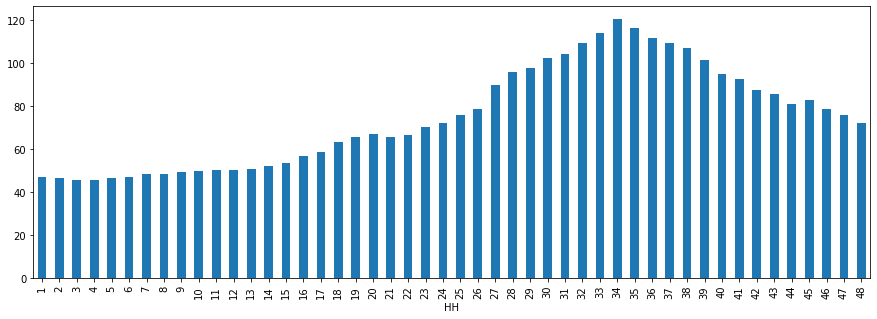

In [347]:
df_intra_HHvol_mean["Volume(Tick count)"].plot.bar(figsize=(15, 5));

Median of the volume on each item

In [348]:
df_intra_HHvol_median =  df_intra.groupby("HH").agg({"Volume(MWh/h)": 'median', "Volume(Tick count)": 'median'}).reset_index()
df_intra_HHvol_median = df_intra_HHvol_median.set_index("HH")
df_intra_HHvol_median.head()

,Volume(MWh/h),Volume(Tick count)
HH,,
1,89.40,42.0
2,86.50,41.0
3,89.00,41.0
4,88.95,40.0
5,95.75,41.0


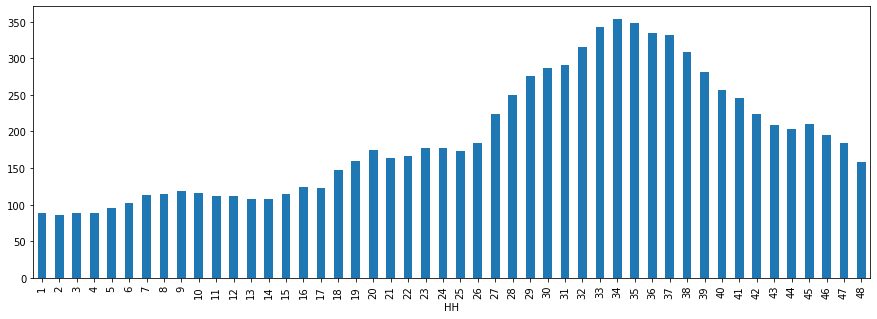

In [349]:
df_intra_HHvol_median["Volume(MWh/h)"].plot.bar(figsize=(15, 5));

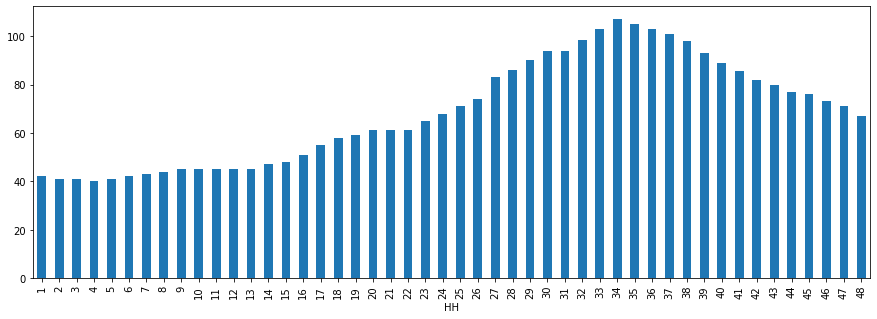

In [350]:
df_intra_HHvol_median["Volume(Tick count)"].plot.bar(figsize=(15, 5));

This shape is similar to daily basis avarage close price

In [351]:
df_intra_dayvolume = df_intra.groupby("Date").agg({"Volume(MWh/h)": 'sum', "Volume(Tick count)": 'sum'}).reset_index()
df_intra_dayvolume = df_intra_dayvolume.iloc[-200:]
df_intra_dayvolume = df_intra_dayvolume.set_index("Date")
df_intra_dayvolume.tail()

,Volume(MWh/h),Volume(Tick count)
Date,,
2021-01-16,18768.8,4727
2021-01-17,23346.0,4340
2021-01-18,19692.8,4700
2021-01-19,17527.7,3977
2021-01-20,28011.7,5140


TypeError: set_xlim() got an unexpected keyword argument 'freq'

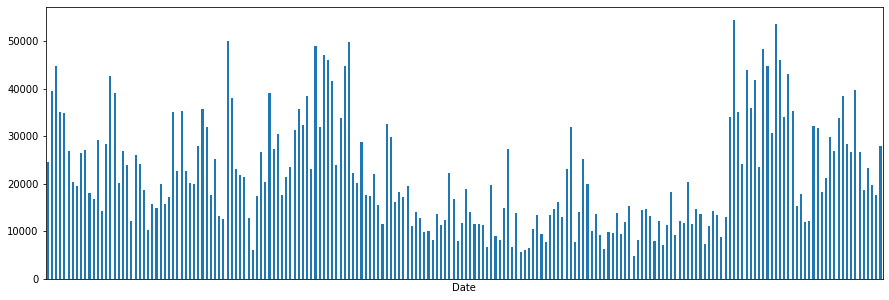

In [354]:
import matplotlib.dates as mdates

# 描画
fig, ax = plt.subplots(figsize=(15, 5))
df_intra_dayvolume['Volume(MWh/h)'].plot.bar(  # indexがx軸に。各columnが各線に。
    ax=ax,
    rot=True,  # 指定しない場合、ラベルが横倒しになる
    legend=False,  # 凡例OFF
)

# 軸目盛の設定
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, tz=None))
plt.show()

#df_intra_dayvolume["Volume(MWh/h)"].plot.bar(interval=7, figsize=(15, 5));

In [ ]:
df_intra_dayvolume["Volume(Tick count)"].plot.bar(figsize=(15, 5));

### Other EDA

ここではもっとデータを見てもいい。例えば、<p>
- 価格データの季節性、定常性、など <p>
- 対数化もしくは正則化 (参照：https://uribo.github.io/practical-ds/02/numeric.html) 
- 外れ値　など

- See distribution of "Close"

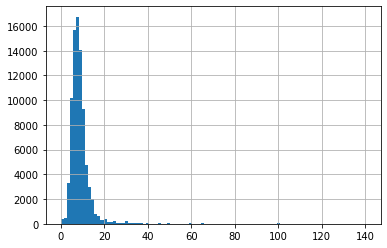

In [153]:
df_intra['Close'].hist(bins=100, range=(0, 140), rwidth=1.0)

-->Negative skew, outliers, positive price only

- See the correlation between Spot price in different area and "Close" price.

In [210]:
# marge all the spot datasets
spot_area = pd.concat([df_spot_2016, df_spot_2017])
spot_area = pd.concat([spot_area, df_spot_2018])
spot_area = pd.concat([spot_area, df_spot_2019])
spot_area = pd.concat([spot_area, df_spot_2020])

spot_area = spot_area.drop(['売り入札量(kWh)', '買い入札量(kWh)', '約定総量(kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

spot_area = spot_area.rename(columns={'年月日': 'Date', '時刻コード': 'HH', 
                                  'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス北海道(円/kWh)': 'Price_Hokkaido(Yen/kWh)',
                                  'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)',
                                  'エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)',
                                  'エリアプライス中部(円/kWh)': 'Price_Chubu(Yen/kWh)',
                                  'エリアプライス北陸(円/kWh)': 'Price_Hokuriku(Yen/kWh)',
                                  'エリアプライス関西(円/kWh)': 'Price_Kansai(Yen/kWh)',
                                  'エリアプライス中国(円/kWh)': 'Price_Chugoku(Yen/kWh)',
                                  'エリアプライス四国(円/kWh)': 'Price_Shikoku(Yen/kWh)',
                                  'エリアプライス九州(円/kWh)': 'Price_Kyushu(Yen/kWh)'})

spot_area["Date"] = pd.to_datetime(spot_area["Date"])

In [211]:
intra_close = df_intra[['Date', 'HH', 'Close']]
intra_close["Date"] = pd.to_datetime(intra_close["Date"])

In [212]:
spot_intra = pd.merge(spot_area, intra_close,  how='left', on=['Date', 'HH'])

In [213]:
spot_intra = spot_intra.drop("HH", axis=1)

In [214]:
spot_intra = spot_intra[spot_intra["Date"] <= "2020/12/31"]

In [215]:
spot_intra.fillna(0, inplace=True)
print(spot_intra.isnull().sum())

Date                       0
System_price(Yen/kWh)      0
Price_Hokkaido(Yen/kWh)    0
Price_Tohoku(Yen/kWh)      0
Price_Tokyo(Yen/kWh)       0
Price_Chubu(Yen/kWh)       0
Price_Hokuriku(Yen/kWh)    0
Price_Kansai(Yen/kWh)      0
Price_Chugoku(Yen/kWh)     0
Price_Shikoku(Yen/kWh)     0
Price_Kyushu(Yen/kWh)      0
Close                      0
dtype: int64


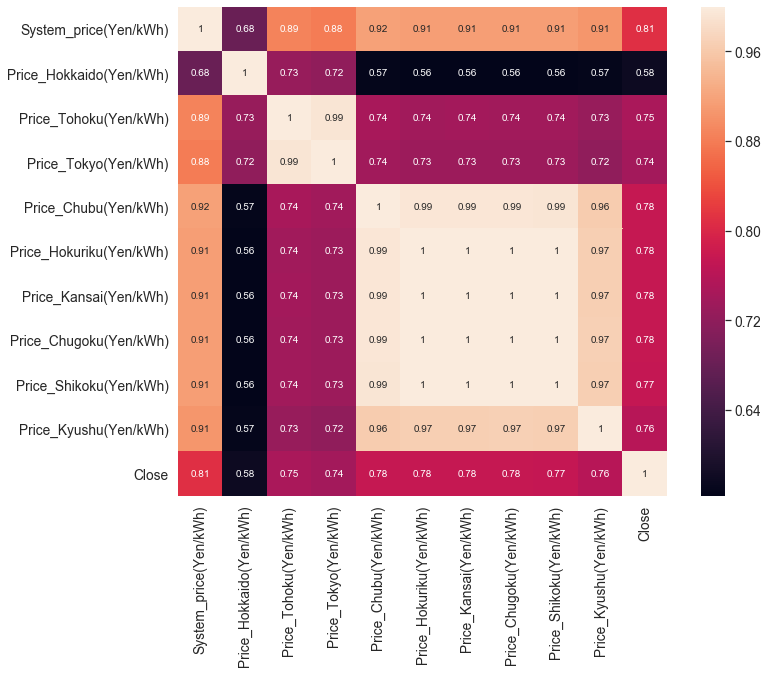

In [219]:
# correlation matrix
corrmat = spot_intra.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, annot=True, annot_kws={'size': 10});

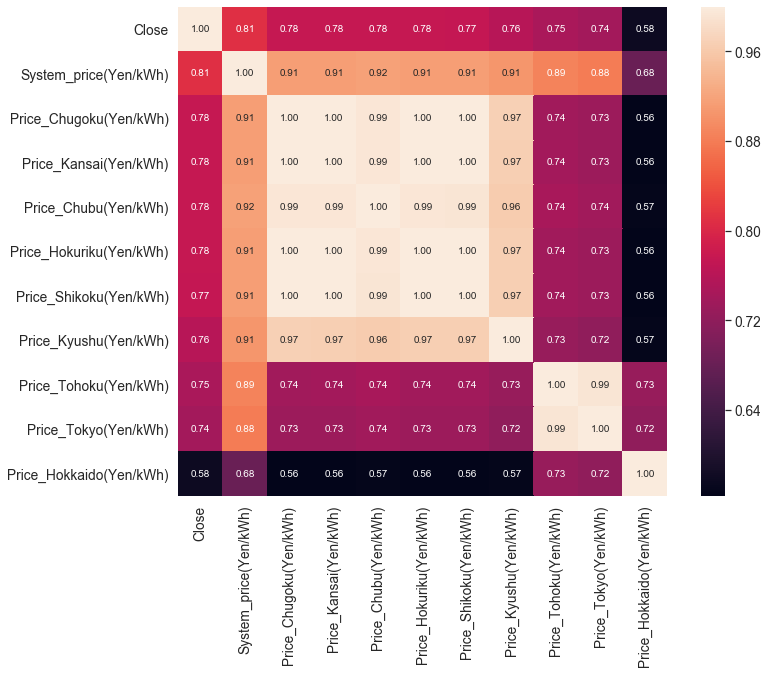

In [217]:
# Close price correlation matrix
k = 11 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(spot_intra[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There is no huge difference of correlation between Close price and each area
--> I will choose "Tohoku area" to pick up weather and other data because this area has larger proportion for installed renewable energy compared to other areas.

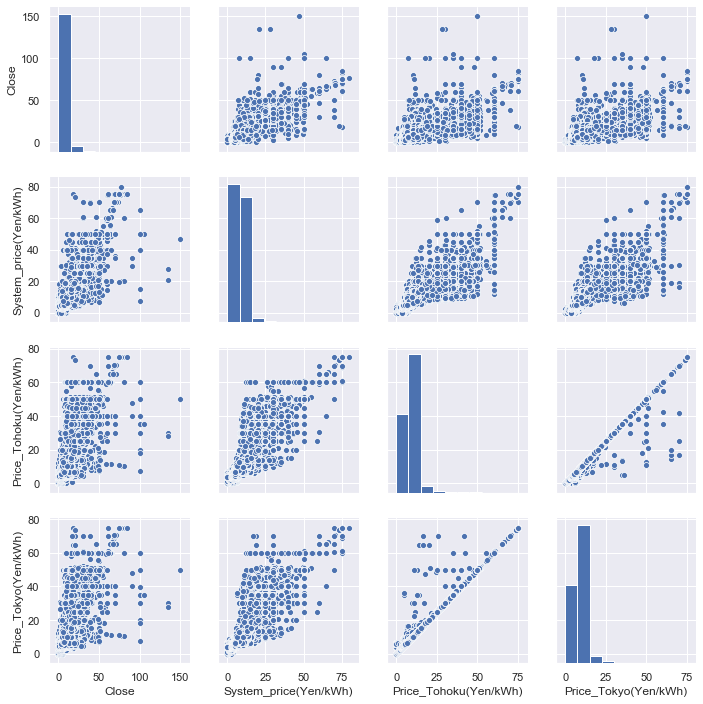

In [221]:
# scatterplot
sns.set()
cols = ['Close', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)']
b(spot_intra[cols], size=2.5)
plt.show()

Price: Neagtive skew <p>
Other: It seems linear relation each other, especially Tohoku and Tokyo

## Weather data (Tohoku area)
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

データを価格データと結合後、欠損値を条件付きで埋めていく方法

Dateを日付と時間に分割

必要な列を抽出

HH_tableを適用（当データにHH_tableを結合）

データ統合後、欠損値を各列ごとに埋めていく

In [44]:
#Read all the weather data in Tohoku area

df_weather_Aomori = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Aomori.csv', sep=',', header=0, encoding='cp932')
df_weather_Akita = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Akita.csv', sep=',', header=0, encoding='cp932')
df_weather_Morioka = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Morioka.csv', sep=',', header=0, encoding='cp932')
df_weather_Yamagata = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Yamagata.csv', sep=',', header=0, encoding='cp932')
df_weather_Sendai = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Sendai.csv', sep=',', header=0, encoding='cp932')
df_weather_Fukushima = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Fukushima.csv', sep=',', header=0, encoding='cp932')
df_weather_Niigata = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Niigata.csv', sep=',', header=0, encoding='cp932')

In [45]:
print(df_weather_Aomori.shape)
print(df_weather_Akita.shape)
print(df_weather_Morioka.shape)
print(df_weather_Yamagata.shape)
print(df_weather_Sendai.shape)
print(df_weather_Fukushima.shape)
print(df_weather_Niigata.shape)

(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)


In [46]:
# marge all the spot datasets
df_weather_all = pd.merge(df_weather_Aomori, df_weather_Akita, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Morioka, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Yamagata, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Sendai, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Fukushima, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Niigata, how='left', on=['Date'])
print(df_weather_all.shape)

(41664, 106)


In [47]:
#Drop the columns that are not necessary
a = [item for item in df_weather_all.columns if item.find('Qual') != -1 or item.find('Num') != -1or item.find('None') != -1]
df_weather_all = df_weather_all.drop(columns=a)

In [48]:
# Replace/adjust the name of direction
df_weather_all = df_weather_all.replace({'北西)': '北西', '南東)': '南東', '東南東)': '東南東', '南)': '南'})

# Categolize direction
df_weather_all = df_weather_all.replace({'静穏': '0', '北': '1', '北北東': '2', '北東': '3', 
                                        '東北東': '4', '東': '5', '東南東': '6', '南東': '7', '南南東': '8', 
                                        '南': '9', '南南西': '10', '南西': '11', '西南西': '12', 
                                        '西': '13', '西北西': '14', '北西': '15', '北北西': '16'})

In [49]:
df_weather_all["Time"] = pd.to_datetime(df_weather_all["Date"]).dt.time
df_weather_all["Date"] = pd.to_datetime(df_weather_all["Date"]).dt.date

In [50]:
cols = [item for item in df_weather_all.columns if item.find('WindDirection') != -1]
df_weather_all[cols] = df_weather_all[cols].apply(pd.to_numeric)

In [51]:
df_weather_all.head()

,Date,Temp_Ao,SunLight(Time)_Ao,WindSpeed(m/s)_Ao,WindDirection_Ao,SunLight(MJ/㎡)_Ao,Temp_Aki,SunLight(Time)_Aki,WindSpeed(m/s)_Aki,WindDirection_Aki,SunLight(MJ/㎡)_Aki,Temp_Mo,SunLight(Time)_Mo,WindSpeed(m/s)_Mo,WindDirection_Mo,SunLight(MJ/㎡)_Mo,Temp_Ya,SunLight(Time)_Ya,WindSpeed(m/s)_Ya,WindDirection_Ya,SunLight(MJ/㎡)_Ya,Temp_Se,SunLight(Time)_Se,WindSpeed(m/s)_Se,WindDirection_Se,SunLight(MJ/㎡)_Se,Temp_Fu,SunLight(Time)_Fu,WindSpeed(m/s)_Fu,WindDirection_Fu,SunLight(MJ/㎡)_Fu,Temp_Ni,SunLight(Time)_Ni,WindSpeed(m/s)_Ni,WindDirection_Ni,SunLight(MJ/㎡)_Ni,Time
0,2016-04-01,2.1,0.0,2.4,10.0,0.0,3.5,0.0,1.9,6.0,0.0,0.9,0.0,0.8,2.0,0.0,4.6,0.0,0.6,16.0,0.0,6.6,0.0,3.1,16.0,0.0,6.5,0.0,0.9,5.0,0.0,8.2,0.0,0.5,6.0,0.0,01:00:00
1,2016-04-01,1.5,0.0,1.5,11.0,0.0,3.4,0.0,2.5,5.0,0.0,0.2,0.0,1.9,2.0,0.0,3.9,0.0,1.0,7.0,0.0,6.7,0.0,2.9,15.0,0.0,5.8,0.0,0.4,9.0,0.0,7.4,0.0,0.7,4.0,0.0,02:00:00
2,2016-04-01,1.2,0.0,0.3,6.0,0.0,3.2,0.0,2.4,6.0,0.0,0.1,0.0,3.0,2.0,0.0,3.3,0.0,1.0,3.0,0.0,7.0,0.0,3.4,15.0,0.0,5.2,0.0,0.7,8.0,0.0,7.0,0.0,1.7,7.0,0.0,03:00:00
3,2016-04-01,0.4,0.0,1.7,10.0,0.0,2.5,0.0,1.9,5.0,0.0,0.4,0.0,3.7,2.0,0.0,2.5,0.0,0.1,0.0,0.0,7.0,0.0,3.1,15.0,0.0,4.6,0.0,0.3,9.0,0.0,6.3,0.0,1.2,4.0,0.0,04:00:00
4,2016-04-01,0.1,0.0,1.5,11.0,0.0,2.1,0.0,1.5,6.0,0.0,-0.8,0.0,2.1,16.0,0.0,2.3,0.0,0.5,4.0,0.0,6.3,0.0,1.7,15.0,0.0,4.0,0.0,0.8,4.0,0.0,6.6,0.0,1.4,5.0,0.0,05:00:00


準備OK　--> Mergeしてから30分時点の欠損値は直前の時間の情報を参照させる (もしくは直前の時間を参照してすべて２で割る)

In [52]:
df_Temp = df_weather_all.iloc[:, df_weather_all.columns.str.contains("Temp")]
df_SunLight_Time = df_weather_all.iloc[:, df_weather_all.columns.str.contains("SunLight" and "Time")].drop("Time", axis=1)
df_SunLight_Volume = df_weather_all.iloc[:, df_weather_all.columns.str.contains("SunLight" and "MJ/㎡")]
df_WindSpeed = df_weather_all.iloc[:, df_weather_all.columns.str.contains("WindSpeed")]
df_WindDirection = df_weather_all.iloc[:, df_weather_all.columns.str.contains("WindDirection")]

In [53]:
df_SunLight_Time.shape

(41664, 7)

In [54]:
print(df_SunLight_Time.isnull().sum())

SunLight(Time)_Ao     6
SunLight(Time)_Aki    8
SunLight(Time)_Mo     3
SunLight(Time)_Ya     3
SunLight(Time)_Se     2
SunLight(Time)_Fu     2
SunLight(Time)_Ni     1
dtype: int64


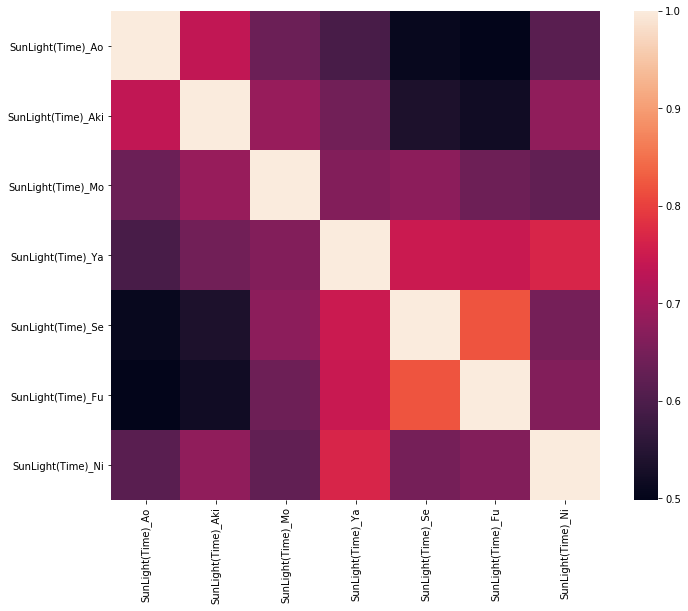

In [55]:
# correlation matrix
corrmat = df_SunLight_Time.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True);

df_Temp: 相関高い -->　平均
df_SunLight_Time: 相関はバラけている
df_SunLight_Volume: 青森 と 仙台/福島が相関0.5程度と低め
df_WindSpeed: 相関低め
df_WindDirection 相関低め

## Actual_generation(Tohoku_area) ※2020年11月まで入手済！！
http://occtonet.occto.or.jp/public/dfw/RP11/OCCTO/SD/LOGIN_login#

Timegrouperで5分値を３０分値へ
https://qiita.com/takechanman1228/items/00daec6a62f831f24e6d

In [56]:
#Actual generation_dataset from 2016-08-01
df_actual_generation_1 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation1.csv', sep=',', header=0, encoding='shift_jis')

#Actual generation_dataset from 2020-04-14
df_actual_generation_2 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation2.csv', sep=',', header=0, encoding='shift_jis')

In [57]:
df_actual_generation_Tohoku = pd.concat([df_actual_generation_1, df_actual_generation_2])
df_actual_generation_Tohoku = df_actual_generation_Tohoku.rename(columns={'DATE': 'Date', 'TIME': 'Time',
    '太陽光発電実績(5分間隔値)(万kW)': 'gen_Solar(mkW)', '当日実績(5分間隔値)(万kW)': 'gen_all(mkW)', '風力発電実績(5分間隔値)(万kW)': 'gen_Wind(mkW)'
})

In [58]:
df_actual_generation_Tohoku["gen_Solar(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_all(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_Wind(mkW)"].fillna(0, inplace=True)

In [59]:
df_actual_generation_Tohoku["DateTime"] = pd.to_datetime(df_actual_generation_Tohoku["Date"] + " " + df_actual_generation_Tohoku["Time"])

In [60]:
df_actual_generation_Tohoku = df_actual_generation_Tohoku.groupby(pd.Grouper(key="DateTime", freq='30min')).sum()

In [61]:
df_actual_generation_Tohoku.reset_index(inplace = True)

In [62]:
df_actual_generation_Tohoku["Time"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.time
df_actual_generation_Tohoku["Date"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.date
df_actual_generation_Tohoku = df_actual_generation_Tohoku.drop("DateTime", axis=1)

In [63]:
df_actual_generation_Tohoku.head()

,gen_all(mkW),gen_Solar(mkW),gen_Wind(mkW),Time,Date
0,4582.0,0.0,0.0,00:00:00,2016-08-01
1,4444.0,0.0,0.0,00:30:00,2016-08-01
2,4410.0,0.0,0.0,01:00:00,2016-08-01
3,4368.0,0.0,0.0,01:30:00,2016-08-01
4,4379.0,0.0,0.0,02:00:00,2016-08-01


In [64]:
print(df_actual_generation_Tohoku.isnull().sum())

gen_all(mkW)      0
gen_Solar(mkW)    0
gen_Wind(mkW)     0
Time              0
Date              0
dtype: int64


準備オッケー

## 時間足需要電力計_All (需要実績, 日別, すべての期間, すべてのエリア)
http://occtonet.occto.or.jp/public/dfw/RP11/OCCTO/SD/LOGIN_login#

時間帯の表記をHH_tableにあわせる

In [65]:
# Hourly demand All_広域
df_HourlyDemand_All = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/需要実績(日別)_ALL.csv', sep=',', header=0, encoding='shift_jis')

In [66]:
# Rename the columns
df_HourlyDemand_All = df_HourlyDemand_All.rename(columns={'年月日': 'Date', '時間帯': 'Period', 
                                                                  '北海道': 'Hokkaido', '東北': 'Tohoku', '東京': 'Tokyo', '中部': 'Chubu', 
                                                                  '北陸': 'Hokuriku', '関西': 'Kansai', '中国': 'Chugoku',
                                                                  '四国': 'Shikoku', '九州': 'Kyushu', '沖縄': 'Okinawa',
                                                                  '１０エリア計': 'Total'
})

In [67]:
# Convert text on the Period column to NaN
df_HourlyDemand_All['Period'] = df_HourlyDemand_All['Period'].replace({'日電力量(MWh)': np.nan, '日最大電力(MW)': np.nan})

In [68]:
# Remove the rows that include NaN
df_HourlyDemand_All = df_HourlyDemand_All[~df_HourlyDemand_All.Period.str.contains("NaN", na=True)]

In [69]:
# Make the column for "DateTime"
df_HourlyDemand_All["DateTime"] = pd.to_datetime(df_HourlyDemand_All["Date"] + " " + df_HourlyDemand_All["Period"].str[:5])

In [70]:
df_HourlyDemand_All["Time"] = pd.to_datetime(df_HourlyDemand_All["DateTime"]).dt.time
df_HourlyDemand_All["Date"] = pd.to_datetime(df_HourlyDemand_All["DateTime"]).dt.date

In [71]:
df_HourlyDemand_All = df_HourlyDemand_All.drop(["Period", "DateTime"], axis=1)

In [72]:
print(df_HourlyDemand_All["Time"].value_counts())

22:00:00    1755
10:00:00    1755
08:00:00    1755
20:00:00    1755
17:00:00    1755
13:00:00    1755
23:00:00    1755
00:00:00    1755
21:00:00    1755
15:00:00    1755
07:00:00    1755
19:00:00    1755
11:00:00    1755
06:00:00    1755
12:00:00    1755
01:00:00    1755
09:00:00    1755
04:00:00    1755
03:00:00    1755
05:00:00    1755
16:00:00    1755
02:00:00    1755
18:00:00    1755
14:00:00    1755
Name: Time, dtype: int64


In [73]:
df_HourlyDemand_All.tail()

,Date,Hokkaido,Tohoku,Tokyo,Chubu,Hokuriku,Kansai,Chugoku,Shikoku,Kyushu,Okinawa,Total,Time
45623,2021-01-19,4875,13849,47574,21446,4884.2,22489.041,9648.096,4271,13052.0,950.1,143038.437,19:00:00
45624,2021-01-19,4791,13316,45771,20683,4716.2,21577.170,9219.801,4128,12639.0,933.2,137774.371,20:00:00
45625,2021-01-19,4748,12682,43551,19875,4566.7,20555.254,8857.116,3872,12067.0,886.1,131660.170,21:00:00
45626,2021-01-19,4567,12093,40735,18674,4401.8,19304.379,8312.672,3551,11485.0,833.2,123957.051,22:00:00
45627,2021-01-19,4684,12098,37972,18100,4438.4,18225.116,8055.683,3482,10960.0,786.8,118801.999,23:00:00


準備OK

## 需要電力計　＋　電源別発電量(東北電力サイトより)_2020_12月未入手
https://setsuden.nw.tohoku-epco.co.jp/download.html (※2)

In [74]:
#Total demand and generation by different type of plants_広域
df_DemandPlant_tohoku = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/actual_generation_and_demand_Tohoku' + "/Demand_plant_tohoku.csv", sep=',', header=0, encoding='shift_jis')

In [75]:
# Rename the columns
df_DemandPlant_tohoku = df_DemandPlant_tohoku.rename(columns={'DATE_TIME': 'DateTime', 'エリア需要〔MWh〕': 'AreaDemand(MWh)', 
                                                                  '水力〔MWh〕': 'Water(MWh)', '火力〔MWh〕': 'Thermal(MWh)', '原子力〔MWh〕': 'Nuclear(MWh)', 
                                                              '太陽光実績〔MWh〕': 'Actual_Solar(MWh)', '太陽光抑制量〔MWh〕': 'Curtailment_Solar(MWh)', 
                                                              '風力実績〔MWh〕': 'Actual_Wind(MWh)', '風力抑制量〔MWh〕': 'Curtailment_Wind(MWh)',
                                                              '地熱〔MWh〕': 'Geothermal(MWh)', 'バイオマス〔MWh〕': 'Biomass(MWh)', '揚水〔MWh〕': 'PumpedStorage(MWh)',
                                                              '連系線〔MWh〕': 'Interconnection(MWh)'
})

In [76]:
# Make the columns for "Time" and "Date"
df_DemandPlant_tohoku["Time"] = pd.to_datetime(df_DemandPlant_tohoku["DateTime"]).dt.time
df_DemandPlant_tohoku["Date"] = pd.to_datetime(df_DemandPlant_tohoku["DateTime"]).dt.date

# Drop the columns that have no value
df_DemandPlant_tohoku = df_DemandPlant_tohoku.drop(["DateTime", "Nuclear(MWh)", "Curtailment_Solar(MWh)", "Curtailment_Wind(MWh)"], axis=1)

In [77]:
df_DemandPlant_tohoku.tail()

,AreaDemand(MWh),Water(MWh),Thermal(MWh),Actual_Solar(MWh),Actual_Wind(MWh),Geothermal(MWh),Biomass(MWh),PumpedStorage(MWh),Interconnection(MWh),Time,Date
40915,10499,1254,11818,0,655,148,399,0,-3775,19:00:00,2020-11-30
40916,10004,1186,11499,0,644,148,399,0,-3872,20:00:00,2020-11-30
40917,9429,1146,11325,0,572,147,398,0,-4159,21:00:00,2020-11-30
40918,9001,1104,10133,0,671,147,388,0,-3442,22:00:00,2020-11-30
40919,8787,1097,10286,0,863,148,390,0,-3997,23:00:00,2020-11-30


In [78]:
print(df_DemandPlant_tohoku.isnull().sum())

AreaDemand(MWh)         0
Water(MWh)              0
Thermal(MWh)            0
Actual_Solar(MWh)       0
Actual_Wind(MWh)        0
Geothermal(MWh)         0
Biomass(MWh)            0
PumpedStorage(MWh)      0
Interconnection(MWh)    0
Time                    0
Date                    0
dtype: int64


準備OK

## 日別翌日需要ピーク(電力需要ピーク情報, 翌日, すべての期間, 東北のみ)
http://occtonet.occto.or.jp/public/dfw/RP11/OCCTO/SD/LOGIN_login#

①とりあえず、ピーク情報を基にMaxとMinのときにフラグと立ててみる <p>
②その後必要であれば、実測値も考慮してみる (ただし、MaxとMin以外の情報を付与できないのでアンバランスになる可能性あり)

In [79]:
# Daily demand peak forecast_Tohoku_広域
df_DemandPeak_Tohoku = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/電力需給予想ピーク時供給力翌日_Tohoku.csv', sep=',', header=0, encoding='shift_jis')

In [80]:
df_DemandPeak_Tohoku.tail()

,策定日,対象日付,対象エリア,最小総需要予想時刻,最小総需要予想（MW）,最大総需要予想時刻,最大総需要予想（MW）,最大供給力予想（MW）,予想使用率,予想予備率
1752,2016/04/04,2016/04/05,東北,01:00,8443,19:00,10115,11985,84.4,18.5
1753,2016/04/03,2016/04/04,東北,01:00,7558,19:00,10520,12405,84.8,17.9
1754,2016/04/02,2016/04/03,東北,01:00,7574,19:00,9355,11305,82.8,20.8
1755,2016/04/01,2016/04/02,東北,15:00,8575,19:00,9749,11831,82.4,21.4
1756,2016/03/31,2016/04/01,東北,01:00,8204,19:00,10277,12009,85.6,16.9


In [81]:
df_DemandPeak_Tohoku = df_DemandPeak_Tohoku.rename(columns={'策定日': 'PlanDate', '対象日付': 'Date', '対象エリア': 'Area',
                                  '最小総需要予想時刻': 'Time_Min', '最小総需要予想（MW）': 'Planned_Min(MW)', 
                                  '最大総需要予想時刻': 'Time_Max', '最大総需要予想（MW）': 'Planned_Max(MW)', 
                                  '最大供給力予想（MW）': 'Planned_Max_Capa(MW)', '予想使用率': 'Planned_usege(%)', '予想予備率': 'Planned_margin(%)'})

In [82]:
df_DemandPeak_Tohoku["Planned_Min_flag"] = 1
df_DemandPeak_Tohoku["Planned_Max_flag"] = 9

In [83]:
df_DemandMin_Tohoku = df_DemandPeak_Tohoku[["Date", "Time_Min", "Planned_Min_flag"]]
df_DemandMin_Tohoku = df_DemandMin_Tohoku.rename(columns={"Time_Min": "Time"})

df_DemandMin_Tohoku["Time"] = df_DemandMin_Tohoku["Time"].str.replace('24:00', '23:00')
df_DemandMin_Tohoku["Date"] = pd.to_datetime(df_DemandMin_Tohoku["Date"]).dt.date
df_DemandMin_Tohoku["Time"] = pd.to_datetime(df_DemandMin_Tohoku["Time"]).dt.time

df_DemandMin_Tohoku.head()

,Date,Time,Planned_Min_flag
0,2021-01-21,23:00:00,1
1,2021-01-20,23:00:00,1
2,2021-01-19,01:00:00,1
3,2021-01-18,01:00:00,1
4,2021-01-17,01:00:00,1


In [84]:
df_DemandMax_Tohoku = df_DemandPeak_Tohoku[["Date", "Time_Max", "Planned_Max_flag"]]
df_DemandMax_Tohoku = df_DemandMax_Tohoku.rename(columns={"Time_Max": "Time"})

df_DemandMax_Tohoku["Date"] = pd.to_datetime(df_DemandMax_Tohoku["Date"]).dt.date
df_DemandMax_Tohoku["Time"] = pd.to_datetime(df_DemandMax_Tohoku["Time"]).dt.time

df_DemandMax_Tohoku.head()

,Date,Time,Planned_Max_flag
0,2021-01-21,10:00:00,9
1,2021-01-20,10:00:00,9
2,2021-01-19,18:00:00,9
3,2021-01-18,10:00:00,9
4,2021-01-17,19:00:00,9


DateとTimeMin or TimeMaxを使ってMerge (一旦はFlagのみマージ)

## Additional data (gas, oil etc.) ※後から追加 LNGの輸送状況や価格はほしいところ

※特に気になる点としては、日本の電力価格はガス火力の影響が大きい点。

LNG価格がきっと必要になる

In [87]:
# Make a brank csv for commodity prices
p_new = pathlib.Path('/Users/kenotsu/Documents/Datasets/Master Thesis/test.csv')
with p_new.open(mode='w') as f:
  f.write('')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kenotsu/Documents/Datasets/Master Thesis/test.csv'

In [88]:
# import yfinance as yf

# WTI= yf.Ticker("MTF=F")

# # get stock info
# # print(msft.info)

# # get historical market data
# hist = WTI.history(period="5d", interval="15m")

# import matplotlib.pyplot as plt
# import seaborn

# # Plot everything by leveraging the very powerful matplotlib package
# hist['Close'].plot(figsize=(16, 9))

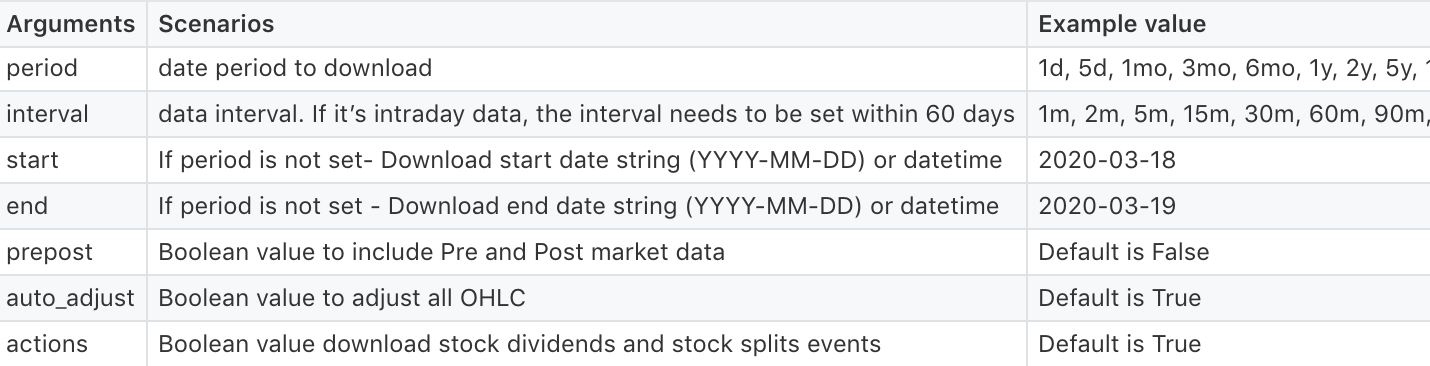

In [89]:
# Download stock data then export as CSV
data_df = yf.download("CL=F", period="max", interval="15m", start="2020-10-01", end="2020-10-31")
data_df.to_csv('WTI.csv')

NameError: name 'yf' is not defined

In [90]:
df_WTI = pd.read_csv('/Users/kenotsu/Documents/データサイエンス学習用/Master_Thesis/WTI.csv', sep=',', header=0)
df_WTI.tail()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kenotsu/Documents/データサイエンス学習用/Master_Thesis/WTI.csv'

# Make all_data

一旦とにかくすべてをくっつける

## Merge all input data

In [86]:
all_data = df_intra

# HH_table
all_data = pd.merge(all_data, HH_table, how="left", on=['HH'])

# df_spot
all_data = pd.merge(all_data, df_spot, how="left", on=['Date', 'HH'])

#df_weather_all
all_data = pd.merge(all_data, df_weather_all, how="left", on=['Date', 'Time'])

#df_actual_generation_Tohoku
all_data = pd.merge(all_data, df_actual_generation_Tohoku, how="left", on=['Date', 'Time'])

#df_HourlyDemand_All
all_data = pd.merge(all_data, df_HourlyDemand_All, how="left", on=['Date', 'Time'])

#df_DemandPlant_tohoku
all_data = pd.merge(all_data, df_DemandPlant_tohoku, how="left", on=['Date', 'Time'])

#df_DemandMin_Tohoku
all_data = pd.merge(all_data, df_DemandMin_Tohoku, how="left", on=['Date', 'Time'])

#df_DemandMax_Tohoku
all_data = pd.merge(all_data, df_DemandMax_Tohoku, how="left", on=['Date', 'Time'])

all_data.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Temp_Ao,SunLight(Time)_Ao,WindSpeed(m/s)_Ao,WindDirection_Ao,SunLight(MJ/㎡)_Ao,Temp_Aki,SunLight(Time)_Aki,WindSpeed(m/s)_Aki,WindDirection_Aki,SunLight(MJ/㎡)_Aki,Temp_Mo,SunLight(Time)_Mo,WindSpeed(m/s)_Mo,WindDirection_Mo,SunLight(MJ/㎡)_Mo,Temp_Ya,SunLight(Time)_Ya,WindSpeed(m/s)_Ya,WindDirection_Ya,SunLight(MJ/㎡)_Ya,Temp_Se,SunLight(Time)_Se,WindSpeed(m/s)_Se,WindDirection_Se,SunLight(MJ/㎡)_Se,Temp_Fu,SunLight(Time)_Fu,WindSpeed(m/s)_Fu,WindDirection_Fu,SunLight(MJ/㎡)_Fu,Temp_Ni,SunLight(Time)_Ni,WindSpeed(m/s)_Ni,WindDirection_Ni,SunLight(MJ/㎡)_Ni,gen_all(mkW),gen_Solar(mkW),gen_Wind(mkW),Hokkaido,Tohoku,Tokyo,Chubu,Hokuriku,Kansai,Chugoku,Shikoku,Kyushu,Okinawa,Total,AreaDemand(MWh),Water(MWh),Thermal(MWh),Actual_Solar(MWh),Actual_Wind(MWh),Geothermal(MWh),Biomass(MWh),PumpedStorage(MWh),Interconnection(MWh),Planned_Min_flag,Planned_Max_flag
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.7,1,00:00:00,5077000,2120500,675500,6.61,6.69,6.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3166.0,7887.0,25547.0,12372.0,2935.0,12917.964,5813.828,2552.0,8017.462,644.7,81852.954,7887.0,1812.0,8072.0,0.0,46.0,116.0,41.0,0.0,-2200.0,NaN,NaN
1,2016-04-01,2,NaN,NaN,NaN,NaN,NaN,0.0,0,00:30:00,5621500,2239000,755500,6.34,6.34,6.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.8,1,01:00:00,5710500,2219000,713500,6.34,6.34,6.34,2.1,0.0,2.4,10.0,0.0,3.5,0.0,1.9,6.0,0.0,0.9,0.0,0.8,2.0,0.0,4.6,0.0,0.6,16.0,0.0,6.6,0.0,3.1,16.0,0.0,6.5,0.0,0.9,5.0,0.0,8.2,0.0,0.5,6.0,0.0,NaN,NaN,NaN,3282.0,8158.0,24334.0,12129.0,3076.0,12835.368,5995.674,2724.0,8177.531,625.9,81337.473,8158.0,1831.0,8299.0,0.0,50.0,116.0,40.0,0.0,-2178.0,1.0,NaN
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.8,1,01:30:00,5536000,2202500,717500,6.25,6.03,6.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.8,1,02:00:00,5461000,2192000,870500,6.57,6.57,6.57,1.5,0.0,1.5,11.0,0.0,3.4,0.0,2.5,5.0,0.0,0.2,0.0,1.9,2.0,0.0,3.9,0.0,1.0,7.0,0.0,6.7,0.0,2.9,15.0,0.0,5.8,0.0,0.4,9.0,0.0,7.4,0.0,0.7,4.0,0.0,NaN,NaN,NaN,3387.0,8420.0,23934.0,12273.0,3270.0,13351.128,6402.637,2982.0,8709.662,639.6,83369.027,8420.0,1876.0,8514.0,0.0,48.0,115.0,38.0,0.0,-2171.0,NaN,NaN


In [87]:
all_data.shape

(84281, 76)

- 基本全部見直し！！

①先にこちらを処理
Generation --> 2016年4月〜2016年7月が欠損。0にて補完 <p>
フラグ --> フラグ以外は欠損のため0で埋める <p>
    
②残りはまとめて処理 <p>
Price data --> データ欠損であるが連続性を保持するため直前参照 <p>
Weather --> 30分値欠損のため直前参照 <p>
需要電力量 --> 30分値欠損のため直前参照　+ 20204Qデータ未入手<p>

In [88]:
# Fillna with 0 for Generation and flag
all_data["gen_Solar(mkW)"].fillna(0, inplace=True)
all_data["gen_all(mkW)"].fillna(0, inplace=True)
all_data["gen_Wind(mkW)"].fillna(0, inplace=True)
all_data["Planned_Min_flag"].fillna(0, inplace=True)
all_data["Planned_Max_flag"].fillna(0, inplace=True)

In [90]:
# Fillna with the average between the previous and later slots for Price, Weather, Demend
all_data.interpolate(method='linear', inplace=True)

In [91]:
# Demand 20204Qデータ未入手のため一旦0で補完
all_data.fillna(0, inplace=True)

In [92]:
print(all_data.isnull().sum())

Date                     0
HH                       0
Open                     0
High                     0
Low                      0
Close                    0
Average                  0
Volume(MWh/h)            0
Volume(Tick count)       0
Time                     0
Sell_volume(kWh)         0
Buy_volume(kWh)          0
Total_volume(kWh)        0
System_price(Yen/kWh)    0
Price_Tohoku(Yen/kWh)    0
Price_Tokyo(Yen/kWh)     0
Temp_Ao                  0
SunLight(Time)_Ao        0
WindSpeed(m/s)_Ao        0
WindDirection_Ao         0
SunLight(MJ/㎡)_Ao        0
Temp_Aki                 0
SunLight(Time)_Aki       0
WindSpeed(m/s)_Aki       0
WindDirection_Aki        0
SunLight(MJ/㎡)_Aki       0
Temp_Mo                  0
SunLight(Time)_Mo        0
WindSpeed(m/s)_Mo        0
WindDirection_Mo         0
SunLight(MJ/㎡)_Mo        0
Temp_Ya                  0
SunLight(Time)_Ya        0
WindSpeed(m/s)_Ya        0
WindDirection_Ya         0
SunLight(MJ/㎡)_Ya        0
Temp_Se                  0
S

In [93]:
# Create a column for "date block num"
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data["date_block_num"] = np.trunc(all_data['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

※ Filter all_data from 2016-04-01 to 2020-12-31

In [94]:
all_data = all_data[all_data["Date"] <= "2020-12-31"]

In [95]:
all_data['month'] = pd.to_datetime(all_data["Date"]).dt.month

In [96]:
all_data.tail()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Temp_Ao,SunLight(Time)_Ao,WindSpeed(m/s)_Ao,WindDirection_Ao,SunLight(MJ/㎡)_Ao,Temp_Aki,SunLight(Time)_Aki,WindSpeed(m/s)_Aki,WindDirection_Aki,SunLight(MJ/㎡)_Aki,Temp_Mo,SunLight(Time)_Mo,WindSpeed(m/s)_Mo,WindDirection_Mo,SunLight(MJ/㎡)_Mo,Temp_Ya,SunLight(Time)_Ya,WindSpeed(m/s)_Ya,WindDirection_Ya,SunLight(MJ/㎡)_Ya,Temp_Se,SunLight(Time)_Se,WindSpeed(m/s)_Se,WindDirection_Se,SunLight(MJ/㎡)_Se,Temp_Fu,SunLight(Time)_Fu,WindSpeed(m/s)_Fu,WindDirection_Fu,SunLight(MJ/㎡)_Fu,Temp_Ni,SunLight(Time)_Ni,WindSpeed(m/s)_Ni,WindDirection_Ni,SunLight(MJ/㎡)_Ni,gen_all(mkW),gen_Solar(mkW),gen_Wind(mkW),Hokkaido,Tohoku,Tokyo,Chubu,Hokuriku,Kansai,Chugoku,Shikoku,Kyushu,Okinawa,Total,AreaDemand(MWh),Water(MWh),Thermal(MWh),Actual_Solar(MWh),Actual_Wind(MWh),Geothermal(MWh),Biomass(MWh),PumpedStorage(MWh),Interconnection(MWh),Planned_Min_flag,Planned_Max_flag,date_block_num,month
83323,2020-12-31,44,35.0,70.0,33.00,70.00,44.71,328.7,110,21:30:00,16913450,22563500,16910000,35.0,35.0,35.0,-6.60,0.0,6.35,13.0,0.0,-4.15,0.0,7.15,15.0,0.0,-8.55,0.0,1.65,12.5,0.0,-3.75,0.0,1.35,7.5,0.0,-2.55,0.0,2.05,11.0,0.0,-2.15,0.0,1.25,12.5,0.0,-0.55,0.0,3.30,12.0,0.0,6246.0,0.0,681.0,4181.0,10394.5,35015.0,13797.0,3486.75,16826.7180,7246.064,3287.0,10965.5,876.95,106076.4820,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0,0.0,0.0,1736.0,12
83324,2020-12-31,45,42.0,70.0,41.01,45.48,50.19,409.9,104,22:00:00,16406450,22394500,16403600,45.0,40.0,40.0,-6.70,0.0,7.20,14.0,0.0,-4.50,0.0,6.90,15.0,0.0,-8.60,0.0,1.60,16.0,0.0,-3.80,0.0,1.30,9.0,0.0,-2.60,0.0,2.10,11.0,0.0,-2.10,0.0,1.40,12.0,0.0,-1.50,0.0,3.60,10.0,0.0,6216.0,0.0,674.0,4162.0,10281.0,34426.0,13534.0,3496.20,16470.3910,7095.273,3216.0,10804.0,855.80,104340.6640,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0,0.0,0.0,1736.0,12
83325,2020-12-31,46,42.0,70.0,35.00,41.33,42.20,383.2,112,22:30:00,16501300,21888250,16497800,40.0,40.0,40.0,-6.75,0.0,6.30,13.5,0.0,-4.25,0.0,7.15,15.0,0.0,-9.35,0.0,1.75,11.0,0.0,-3.75,0.0,1.35,9.5,0.0,-2.60,0.0,1.95,11.0,0.0,-2.20,0.0,1.35,12.0,0.0,-1.60,0.0,3.55,10.0,0.0,6123.0,0.0,688.0,4312.5,10536.5,34233.0,13621.5,3592.20,16468.0705,7147.158,3267.0,10853.5,842.55,104873.9785,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0,0.0,0.0,1736.0,12
83326,2020-12-31,47,37.0,70.0,33.93,36.66,44.09,345.9,60,23:00:00,16224050,21729250,16219200,35.0,35.0,35.0,-6.80,0.0,5.40,13.0,0.0,-4.00,0.0,7.40,15.0,0.0,-10.10,0.0,1.90,6.0,0.0,-3.70,0.0,1.40,10.0,0.0,-2.60,0.0,1.80,11.0,0.0,-2.30,0.0,1.30,12.0,0.0,-1.70,0.0,3.50,10.0,0.0,6399.0,0.0,687.0,4463.0,10792.0,34040.0,13709.0,3688.20,16465.7500,7199.043,3318.0,10903.0,829.30,105407.2930,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0,0.0,0.0,1736.0,12
83327,2020-12-31,48,27.0,37.5,23.93,26.46,28.42,233.3,66,23:30:00,16207050,21202500,16200350,25.0,25.0,25.0,-6.85,0.0,5.55,12.5,0.0,-3.65,0.0,7.15,15.0,0.0,-9.60,0.0,2.30,6.5,0.0,-3.70,0.0,1.05,5.5,0.0,-2.35,0.0,1.55,11.0,0.0,-2.40,0.0,0.90,9.5,0.0,-1.70,0.0,3.40,10.0,0.0,6464.0,0.0,670.0,4481.0,10706.0,32940.0,13447.5,3681.40,16055.0540,7173.613,3303.0,10678.0,805.10,103270.6670,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0,0.0,0.0,1736.0,12


In [97]:
all_data.shape

(83328, 78)

In [115]:
all_data.to_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/all_data.csv', index=False)

In [124]:
all_data_for_test = all_data[all_data['date_block_num'] <= 275]

(13200, 78)

In [125]:
all_data_for_test.to_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/all_data_for_test.csv', index=False)

# Data leakage(Predictionポイントは前日の16:30とする)
Volumu確認後、当日の0:00にする可能性もあり

In [101]:
# all_data = all_data.drop('Date', axis=1)
# all_data = all_data.drop('Time', axis=1)

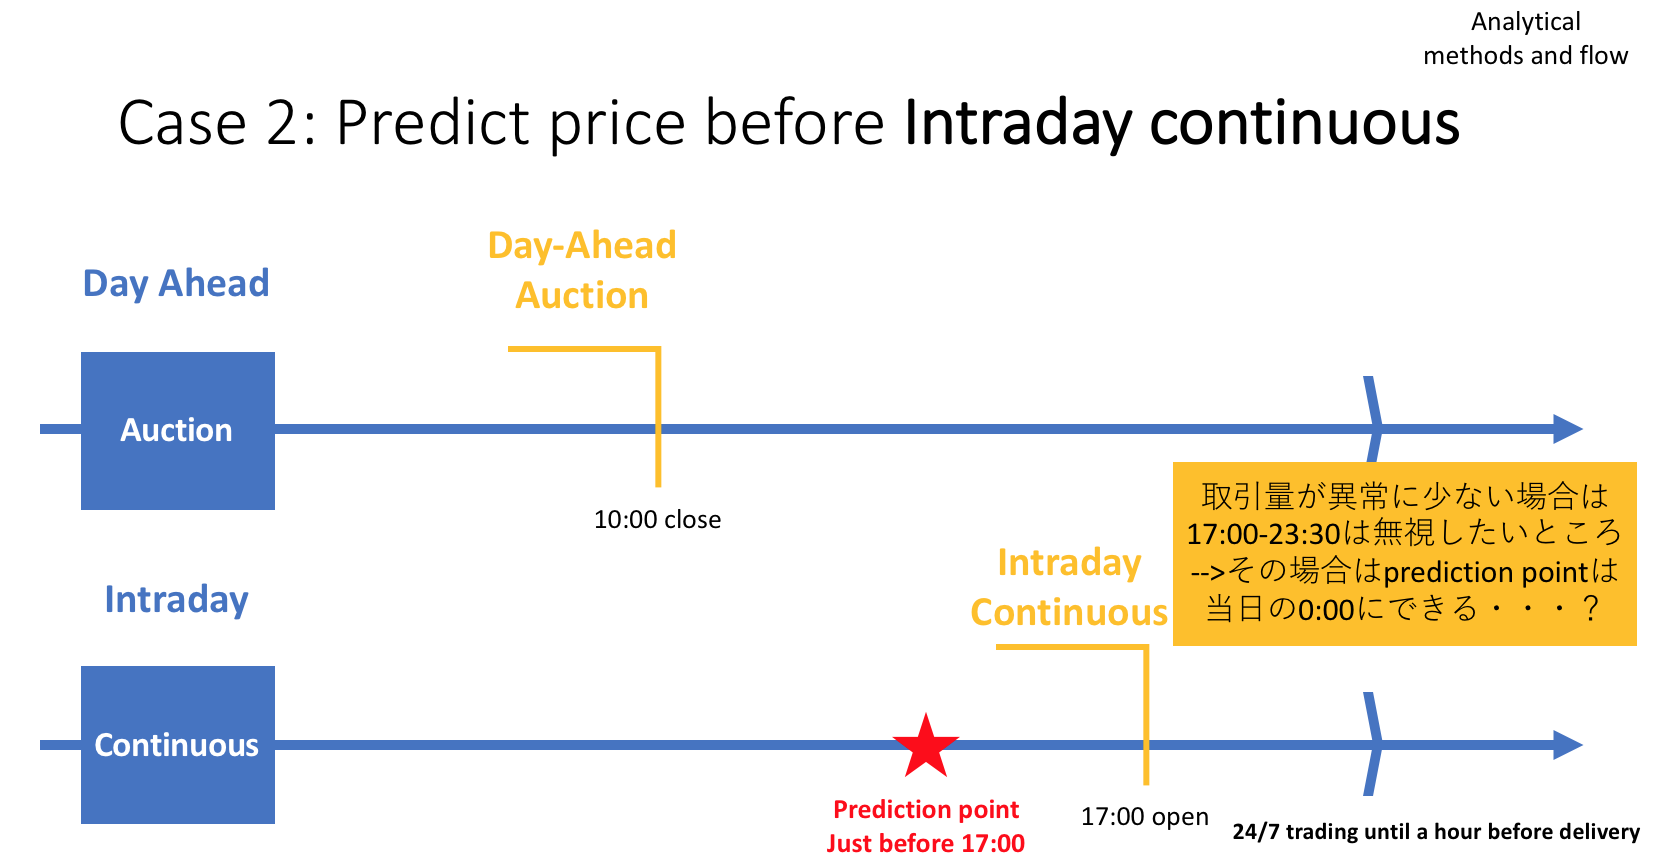

予測時点でどの特徴量が存在しうるか整理する

- Close priceは外す (Target) 
- Spot_price & volume: そのまま(Spot価格確定後の予測)
- 電力需要ピーク情報: そのまま（翌日予測）
- その他: <p>
    ① block_date_numを１日分だけずらす (Prediction pointを0:00直前に変更する)<p>
        ※ここでの論点はIntraday開始直後に取引される17:00から24:00までのアイテムだが、取引量は少ないと仮定して一旦は取引を無視する。(もう少し整理が必要)
        
    
    その上で更に、<p>
    ② HHを1スロット分ずらす <p>
    ③ その他はseasonality検証後に必要に応じて追加 <p>
    ④ lag_feature生成後元の特徴量は全て削除 <p>

※欠損値は0でないほうがいい --> 削除？　要検証

# Feature Engineering

<EDA前にやること><p>
【時系列分析の基本】定常性とホワイトノイズを分かりすく解説 <p>
https://ai-trend.jp/basic-study/time-series-analysis/time-series-analysis-stationaly-noise/
    
時系列データに定常性を持たせて解析する方法
https://ai-trend.jp/basic-study/time-series-analysis/stationarity/

機械学習による株価予測　いろはの”い”
https://qiita.com/blog_UKI/items/25dc1c2559c61890a449

## Mean encoding (共通のグループの平均値などの)一旦スキップ

[Mean Encoding without regularization]

In [104]:
# # # Calculate a mapping: {item_id: target_mean}
# all_data2 = all_data
# item_id_target_mean = all_data2.groupby('item_id').item_cnt_month.mean()

# # In our non-regularized case we just *map* the computed means to the `item_id`'s
# all_data2['item_target_enc1'] = all_data2['item_id'].map(item_id_target_mean)

# # Fill NaNs
# all_data2['item_target_enc1'].fillna(0.3343, inplace=True) 

# # Print correlation
# encoded_feature = all_data2['item_target_enc1'].values
# print(np.corrcoef(all_data2['item_cnt_month'].values, encoded_feature)[0][1])

[Expanding mean scheme]

In [105]:
# %time

# cumsum = all_data2.groupby('item_id')['item_cnt_month'].cumsum() - all_data2['item_cnt_month']
# cumcnt = all_data2.groupby('item_id').cumcount()

# all_data2['item_target_enc2'] = cumsum / cumcnt
# all_data2['item_target_enc2'].fillna(0.3343, inplace=True)
# encoded_feature = all_data2['item_target_enc2'].values

# corr = np.corrcoef(all_data2['item_cnt_month'].values, encoded_feature)[0][1]
# print(corr)

※一旦全てにラグ特徴量を適用する
 -->ただし、計算コストを下げるために可能であれば、ここで特徴量間の相関が高いものは排除する (天気データなど)

In [ ]:
# Reduce the number of features which have high correlation each other
#all_data = all_data.drop(df.all_data[df.all_data.str.contains('' or '' or '')], axis=1)

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [326]:
# from tqdm import tqdm_notebook

# def downcast_dtypes(df):
#     '''
#         Changes column types in the dataframe: 
                
#                 `float64` type to `float32`
#                 `int64`   type to `int32`
#     '''
    
#     # Select columns to downcast
#     float_cols = [c for c in df if df[c].dtype == "float64"]
#     int_cols =   [c for c in df if df[c].dtype == "int64"]
    
#     # Downcast
#     df[float_cols] = df[float_cols].astype(np.float16)
#     df[int_cols]   = df[int_cols].astype(np.int16)
    
#     return df

In [274]:
# def fill_na(df):
#     for col in df.columns:
#         if ('_lag_' in col) & (df[col].isnull().any()):
#             df[col].fillna(0, inplace=True)         
#     return df

In [327]:
# all_data = downcast_dtypes(all_data)

In [286]:
# Delete the dataframe that will not be used in order to save the memory on PC
# del df_train

In [106]:
# Check the remaining memory on PC
import gc
gc.collect()

133

※ ラグ特徴量が必要ないものと"Close"(target)は外す

In [98]:
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'Planned_Min_flag', 'Planned_Max_flag',
       'date_block_num', 'month'])

In [99]:
lag_columns

Index(['Open', 'High', 'Low', 'Average', 'Volume(MWh/h)', 'Volume(Tick count)',
       'Temp_Ao', 'SunLight(Time)_Ao', 'WindSpeed(m/s)_Ao', 'WindDirection_Ao',
       'SunLight(MJ/㎡)_Ao', 'Temp_Aki', 'SunLight(Time)_Aki',
       'WindSpeed(m/s)_Aki', 'WindDirection_Aki', 'SunLight(MJ/㎡)_Aki',
       'Temp_Mo', 'SunLight(Time)_Mo', 'WindSpeed(m/s)_Mo', 'WindDirection_Mo',
       'SunLight(MJ/㎡)_Mo', 'Temp_Ya', 'SunLight(Time)_Ya',
       'WindSpeed(m/s)_Ya', 'WindDirection_Ya', 'SunLight(MJ/㎡)_Ya', 'Temp_Se',
       'SunLight(Time)_Se', 'WindSpeed(m/s)_Se', 'WindDirection_Se',
       'SunLight(MJ/㎡)_Se', 'Temp_Fu', 'SunLight(Time)_Fu',
       'WindSpeed(m/s)_Fu', 'WindDirection_Fu', 'SunLight(MJ/㎡)_Fu', 'Temp_Ni',
       'SunLight(Time)_Ni', 'WindSpeed(m/s)_Ni', 'WindDirection_Ni',
       'SunLight(MJ/㎡)_Ni', 'gen_all(mkW)', 'gen_Solar(mkW)', 'gen_Wind(mkW)',
       'Hokkaido', 'Tohoku', 'Tokyo', 'Chubu', 'Hokuriku', 'Kansai', 'Chugoku',
       'Shikoku', 'Kyushu', 'Okinawa', 'Total', '

厳密にすると、17:00〜23:30は予測時点では１日前の情報は手に入らない
Prediction pointを「前日の17:00直前」とする場合は、以下の手当が必要
予測時点の前後でDaylag1とDaylag2の参照を変える
もともとのカラムに格納し、カラム名を変更する
Daylag1とDaylag2を削除する

※一旦はPrediction pointを当日0:00直前とし、スキップする (前日の17:00〜23:59の取引は少ないものと仮定する)

In [100]:
def generate_lag_day(train, days, cols):
   
    for col in cols:
        for day in days:
           # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_Daylag_'+ str(day)]
            train_shift['date_block_num'] += day
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
   
    return train

In [101]:
all_data_lagged = generate_lag_day(all_data, [1], lag_columns)

In [102]:
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

In [103]:
print(all_data_lagged.isnull().sum().head(20))

Date                            0
HH                              0
Close                           0
Time                            0
Sell_volume(kWh)                0
Buy_volume(kWh)                 0
Total_volume(kWh)               0
System_price(Yen/kWh)           0
Price_Tohoku(Yen/kWh)           0
Price_Tokyo(Yen/kWh)            0
Planned_Min_flag                0
Planned_Max_flag                0
date_block_num                  0
month                           0
Open_Daylag_1                  48
High_Daylag_1                  48
Low_Daylag_1                   48
Average_Daylag_1               48
Volume(MWh/h)_Daylag_1         48
Volume(Tick count)_Daylag_1    48
dtype: int64


NaN was generated only on 48 timeslots on the firstday 2016/04/01 --> OK 

In [104]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().head(20))

Date                           0
HH                             0
Close                          0
Time                           0
Sell_volume(kWh)               0
Buy_volume(kWh)                0
Total_volume(kWh)              0
System_price(Yen/kWh)          0
Price_Tohoku(Yen/kWh)          0
Price_Tokyo(Yen/kWh)           0
Planned_Min_flag               0
Planned_Max_flag               0
date_block_num                 0
month                          0
Open_Daylag_1                  0
High_Daylag_1                  0
Low_Daylag_1                   0
Average_Daylag_1               0
Volume(MWh/h)_Daylag_1         0
Volume(Tick count)_Daylag_1    0
dtype: int64


In [105]:
all_data_lagged.tail()

,Date,HH,Close,Time,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Planned_Min_flag,Planned_Max_flag,date_block_num,month,Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_all(mkW)_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1
83323,2020-12-31,44,70.00,21:30:00,16913450,22563500,16910000,35.0,35.0,35.0,0.0,0.0,1736.0,12,50.00,55.00,30.00,43.81,475.7,190.0,-3.75,0.0,7.05,13.0,0.0,-2.5,0.0,8.15,14.5,0.0,-2.85,0.0,2.60,11.5,0.0,-2.40,0.0,1.2,14.0,0.0,-0.40,0.0,5.60,14.0,0.0,0.00,0.0,6.05,14.0,0.0,0.15,0.0,7.05,14.5,0.0,6280.0,0.0,673.0,4243.0,10368.0,33324.0,13367.5,3448.9,16495.816,7210.2095,3276.5,11632.5,846.85,104213.2755,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0
83324,2020-12-31,45,45.48,22:00:00,16406450,22394500,16403600,45.0,40.0,40.0,0.0,0.0,1736.0,12,50.00,55.00,30.00,44.40,777.0,206.0,-3.70,0.0,8.50,14.0,0.0,-3.3,0.0,7.10,15.0,0.0,-3.10,0.0,3.50,14.0,0.0,-2.70,0.0,1.2,14.0,0.0,-0.20,0.0,9.20,14.0,0.0,-0.30,0.0,3.40,14.0,0.0,-0.20,0.0,6.50,14.0,0.0,6213.0,0.0,663.0,4166.0,10159.0,32448.0,12991.0,3414.7,15995.051,7013.7270,3157.0,11312.0,821.40,101477.8780,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0
83325,2020-12-31,46,41.33,22:30:00,16501300,21888250,16497800,40.0,40.0,40.0,0.0,0.0,1736.0,12,50.00,55.00,29.00,38.29,640.4,188.0,-3.70,0.0,6.50,13.5,0.0,-3.1,0.0,5.50,15.5,0.0,-3.40,0.0,4.55,14.0,0.0,-2.75,0.0,1.2,12.5,0.0,-0.45,0.0,7.15,14.0,0.0,-0.65,0.0,3.95,14.0,0.0,-0.40,0.0,6.45,14.0,0.0,6019.0,0.0,641.0,4249.0,10127.0,31691.0,12870.5,3455.9,15692.925,6904.7145,3138.5,11089.0,798.05,100016.5895,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0
83326,2020-12-31,47,36.66,23:00:00,16224050,21729250,16219200,35.0,35.0,35.0,0.0,0.0,1736.0,12,33.21,36.11,28.92,32.62,740.2,178.0,-3.70,0.0,4.50,13.0,0.0,-2.9,0.0,3.90,16.0,0.0,-3.70,0.0,5.60,14.0,0.0,-2.80,0.0,1.2,11.0,0.0,-0.70,0.0,5.10,14.0,0.0,-1.00,0.0,4.50,14.0,0.0,-0.60,0.0,6.40,14.0,0.0,6053.0,0.0,740.0,4332.0,10095.0,30934.0,12750.0,3497.1,15390.799,6795.7020,3120.0,10866.0,774.70,98555.3010,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0
83327,2020-12-31,48,26.46,23:30:00,16207050,21202500,16200350,25.0,25.0,25.0,0.0,0.0,1736.0,12,25.00,34.16,17.76,24.13,787.1,199.0,-3.80,0.0,6.15,13.0,0.0,-2.7,0.0,5.70,16.0,0.0,-4.15,0.0,5.20,14.0,0.0,-2.75,0.0,1.5,12.5,0.0,-1.00,0.0,3.70,13.5,0.0,-1.20,0.0,4.30,14.0,0.0,-0.15,0.0,6.65,13.5,0.0,6038.0,0.0,759.0,4322.0,9963.0,29799.5,12445.5,3471.5,14944.900,6746.0200,3099.0,10611.5,751.00,96153.9200,8787.0,1097.0,10286.0,0.0,863.0,148.0,390.0,0.0,-3997.0


In [ ]:
# # 考えられるループ (必要に応じて作成する)
# def daylag_rename(train, HHs, cols):
#     #　カラムを１つずつ取得
#     for col in cols:
#         train = train[['date_block_num', 'HH', col]].copy()
#         train.columns = ['date_block_num', 'HH', col+'_Daylag']

# def adjust_lag(train, HHs, cols):
#     #　カラムを１つずつ取得
#     for col in cols:
#         # HHを１つずつ取得
#         for HH in HHs:
#             # HHが35(17:00)以上48(23:30)以下であれば
#             if 35 <= HH >=48:
#                 ２日前のデータを参照
#             else:
#                 １日前のデータ参照

#             # Change the name of  lag features
#             train_shift.columns = ['date_block_num', 'HH', col+'_Daylag']
#             train_shift['HH'] += HH
            
#             # Adjust HH
#             for i in train['HH']:
#                 if i == 49:
#                     train_shift['HH'] == 1
#                     train_shift['date_block_num'] += 1

# 定義実行
# all_data_lagged = generate_lag_day(all_data_lagged, [1, 2], lag_columns)

#欠損値を確認
# print(all_data_lagged.isnull().sum())

# "Daylag"カラムに数値が反映されていることをかくにんしたら、Daylag_1とDay_lag2は削除
#all_data = all_data.drop(df.all_data[df.all_data.str.contains('Daylag_1' or 'Day_lag2' )], axis=1)

In [106]:
def generate_lag_HH(train, HHs, cols):
    for col in cols:

        for HH in HHs:
            # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_HHlag_'+ str(HH)]
            train_shift['HH'] += HH
            
            # Adjust HH
            for i in train['HH']:
                if i == 49:
                    train_shift['HH'] == 1
                    train_shift['date_block_num'] += 1

            # Merge lagged features into the original df
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
    return train

※ラグ特徴量が必要ないものと"Close"(target)は再度外す

In [107]:
lag_columns = all_data_lagged.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'Planned_Min_flag', 'Planned_Max_flag',
       'date_block_num', 'month'])

In [108]:
lag_columns

Index(['Open_Daylag_1', 'High_Daylag_1', 'Low_Daylag_1', 'Average_Daylag_1',
       'Volume(MWh/h)_Daylag_1', 'Volume(Tick count)_Daylag_1',
       'Temp_Ao_Daylag_1', 'SunLight(Time)_Ao_Daylag_1',
       'WindSpeed(m/s)_Ao_Daylag_1', 'WindDirection_Ao_Daylag_1',
       'SunLight(MJ/㎡)_Ao_Daylag_1', 'Temp_Aki_Daylag_1',
       'SunLight(Time)_Aki_Daylag_1', 'WindSpeed(m/s)_Aki_Daylag_1',
       'WindDirection_Aki_Daylag_1', 'SunLight(MJ/㎡)_Aki_Daylag_1',
       'Temp_Mo_Daylag_1', 'SunLight(Time)_Mo_Daylag_1',
       'WindSpeed(m/s)_Mo_Daylag_1', 'WindDirection_Mo_Daylag_1',
       'SunLight(MJ/㎡)_Mo_Daylag_1', 'Temp_Ya_Daylag_1',
       'SunLight(Time)_Ya_Daylag_1', 'WindSpeed(m/s)_Ya_Daylag_1',
       'WindDirection_Ya_Daylag_1', 'SunLight(MJ/㎡)_Ya_Daylag_1',
       'Temp_Se_Daylag_1', 'SunLight(Time)_Se_Daylag_1',
       'WindSpeed(m/s)_Se_Daylag_1', 'WindDirection_Se_Daylag_1',
       'SunLight(MJ/㎡)_Se_Daylag_1', 'Temp_Fu_Daylag_1',
       'SunLight(Time)_Fu_Daylag_1', 'WindSpeed(

In [109]:
# Generate lag for 48h(1day) and 49h(1day + 1 slot) before
all_data_lagged = generate_lag_HH(all_data_lagged, [1], lag_columns)

In [110]:
print(all_data_lagged.isnull().sum().tail())

Actual_Wind(MWh)_Daylag_1_HHlag_1        1736
Geothermal(MWh)_Daylag_1_HHlag_1         1736
Biomass(MWh)_Daylag_1_HHlag_1            1736
PumpedStorage(MWh)_Daylag_1_HHlag_1      1736
Interconnection(MWh)_Daylag_1_HHlag_1    1736
dtype: int64


In [111]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().tail())

Actual_Wind(MWh)_Daylag_1_HHlag_1        0
Geothermal(MWh)_Daylag_1_HHlag_1         0
Biomass(MWh)_Daylag_1_HHlag_1            0
PumpedStorage(MWh)_Daylag_1_HHlag_1      0
Interconnection(MWh)_Daylag_1_HHlag_1    0
dtype: int64


In [113]:
all_data_lagged.columns

Index(['Date', 'HH', 'Close', 'Time', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)',
       ...
       'Total_Daylag_1_HHlag_1', 'AreaDemand(MWh)_Daylag_1_HHlag_1',
       'Water(MWh)_Daylag_1_HHlag_1', 'Thermal(MWh)_Daylag_1_HHlag_1',
       'Actual_Solar(MWh)_Daylag_1_HHlag_1',
       'Actual_Wind(MWh)_Daylag_1_HHlag_1', 'Geothermal(MWh)_Daylag_1_HHlag_1',
       'Biomass(MWh)_Daylag_1_HHlag_1', 'PumpedStorage(MWh)_Daylag_1_HHlag_1',
       'Interconnection(MWh)_Daylag_1_HHlag_1'],
      dtype='object', length=142)

## Holiday setting

休日設定が必要であればここで調整
※一旦スキップ

In [ ]:
# holiday_dict = {
#     0: 6,
#     1: 3,
#     2: 2,
#     3: 8,
#     4: 3,
#     5: 3,
#     6: 2,
#     7: 8,
#     8: 4,
#     9: 8,
#     10: 5,
#     11: 4,
# }

In [ ]:
#all_data['holidays_in_month'] = all_data['month'].map(holiday_dict)

## Standardise with Log-features (対数化)

In [126]:
all_data_lagged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83328 entries, 0 to 83327
Columns: 142 entries, Date to Interconnection(MWh)_Daylag_1_HHlag_1
dtypes: datetime64[ns](1), float64(135), int64(5), object(1)
memory usage: 90.9+ MB


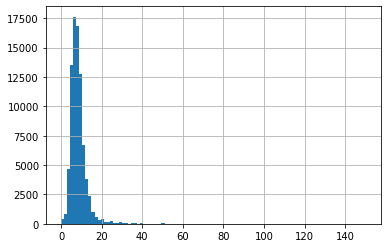

In [143]:
all_data_lagged["Close"].hist(bins=100);

In [127]:
all_data_log1 = all_data_lagged[['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_log2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)

In [128]:
all_data_log2.head()

,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_all(mkW)_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
0,7.69,5077000,2120500,675500,6.61,6.69,6.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [129]:
cols = all_data_log2.columns

In [130]:
# logarithmic transformation for standardised
# 0と負の値を含む列があるので、PowerTransformer()のYeo-Johnson変換を適用する (対数変換の一種)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
pt.fit(all_data_log2[cols])
all_data_log2[cols] = pt.transform(all_data_log2[cols])

In [131]:
all_data_log = pd.concat([all_data_log1, all_data_log2], axis=1)

In [132]:
all_data_log.head()

,Date,Time,HH,date_block_num,month,Planned_Min_flag,Planned_Max_flag,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_all(mkW)_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
0,2016-04-01,00:00:00,1,1.0,4,0.0,0.0,-0.074394,-1.291817,-1.673085,-1.633175,-0.452571,-0.625136,-0.647312,-4.697349,-10.213516,-3.375777,-7.471582,-2.708349,-3.391356,-1.275375,-0.6572,-2.952773,-2.037723,-0.863949,-1.479327,-0.644726,-3.445727,-2.428749,-0.854845,-1.184566,-0.659142,-3.095247,-2.059694,-0.866758,-1.413351,-0.658802,-3.25294,-2.06214,-0.870976,-1.758454,-0.680723,

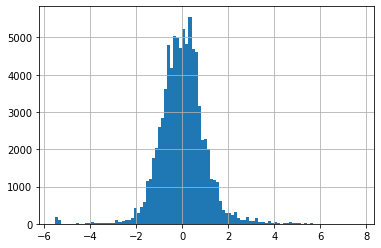

In [144]:
all_data_log["Close"].hist(bins=100);

※ Confirm whether inverse transform works appropriately, or not

In [133]:
all_data_log_inverse1 = all_data_log[['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_log_inverse2 = all_data_log.drop(['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)
all_data_log_inverse2.head()

,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_all(mkW)_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
0,-0.074394,-1.291817,-1.673085,-1.633175,-0.452571,-0.625136,-0.647312,-4.697349,-10.213516,-3.375777,-7.471582,-2.708349,-3.391356,-1.275375,-0.6572,-2.952773,-2.037723,-0.863949,-1.479327,-0.644726,-3.445727,-2.428749,-0.854845,-1.184566,-0.659142,-3.095247,-2.059694,-0.866758,-1.413351,-0.658802,-3.25294,-2.06214,-0.870976,-1.758454,-0.680723,-3.238885,-2.07044,-0.867044,-1.705718,-0.664675,-2.797125,-2.113755,-0.868179,-1.899659,-0.653744,-3.59

In [134]:
cols = all_data_log_inverse2.columns

In [135]:
pt = PowerTransformer()
pt.fit(all_data_log_inverse2[cols])
all_data_log_inverse2[cols] = pt.inverse_transform(all_data_log_inverse2[cols])

In [136]:
all_data_log_inverse = pd.concat([all_data_log_inverse1, all_data_log_inverse2], axis=1)

In [137]:
all_data_log_inverse.head()

,Date,Time,HH,date_block_num,month,Planned_Min_flag,Planned_Max_flag,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_all(mkW)_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
0,2016-04-01,00:00:00,1,1.0,4,0.0,0.0,-0.080107,-1.329605,-1.833016,-1.829302,-0.457652,-0.624334,-0.644789,-4.7811,-10.20631,-3.281786,-7.398251,-2.686207,-3.354258,-1.319201,-0.648532,-2.971834,-2.280814,-0.828197,-1.558721,-0.636615,-3.443608,-2.469285,-0.818028,-1.208102,-0.650941,-3.075797,-2.209877,-0.831972,-1.483512,-0.650231,-3.148902,-2.222123,-0.836949,-1.900026,-0.672281

※If PowerTransformer does not work due to infinity value, the following process must be implemented.

In [ ]:
# print(np.any(np.isnan(all_data_lagged).sum()))
# print(np.any(np.isfinite(all_data_lagged).sum()))

In [ ]:
# Searching infinity value
# a = all_data_lagged.replace([np.inf, -np.inf], np.nan)
# print(a.isnull().sum().head(150))

In [ ]:
# all_data_lagged_2 = all_data_lagged_2.drop(["Total_Daylag_1", "Total_Daylag_1_HHlag_1"], axis=1)
# print(np.any(np.isnan(all_data_lagged).sum()))
# print(np.any(np.isfinite(all_data_lagged).sum()))

※ Inverse_transform(逆対数変換)についても調べる！！　予測後のClose priceを元の数値に戻す必要がある！！

# EDA (for all_data)

In [ ]:
all_data_log.head()

## Check the Correlation between features
    -->相関が極めて高いものはグルーピングして訓練データ内でダブらないようにする


In [ ]:
# correlation matrix
corrmat = all_data_log.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True);

## Check the correlation of features with the target
    -->上位相関(正と負)はピックアップして更に数値にしてみる

In [ ]:
# revenue correlation matrix
k = 10 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# scatterplot
sns.set()
cols = ['Close', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)', 'Average_Daylag_1', 'Low_Daylag_1', 'Open_Daylag_1', 'High_Daylag_1', 'Average_Daylag_1_HHlag_1']
sns.pairplot(all_data_log[cols], size=2.5)
plt.show()

<メモ><p>
    - 外れ値は見られるが線形の関係が見られる <p>
    - OpenとCloseの相関は見られないが、OpenとHighはなぜか相関が高い。（Openで高値がつきやすい？） <p>
    - TokyoとTohokuは高い相関が見られる

外れ値はここで処理しておく --> ただし一概に外れ値を除去するべきとは限らない。要検討 <P>
全体のEDAで気になる点がでれば個別にEDA

In [264]:
# Remove the ourliers 
# all_data = all_data[all_data.item_price<60000]

In [ ]:
# Re-confirm the outliers with scatter plot
# var = "item_price"
# data = pd.concat([all_data['item_cnt_month'], all_data[var]], axis=1)
# data.plot.scatter(x=var, y='item_cnt_month', ylim=(0,100));

Chack time series trend on the data set

In [251]:
# # Pick up one sample shop_id and item_id
# all_data_plot = all_data[all_data['shop_id'] == 25]
# all_data_plot = all_data_plot[all_data_plot['item_id'] == 5037]
# all_data_plot.head()

,date_block_num,item_cnt_month,item_id,item_price,shop_id,item_category_id
503154,20,9.0,5037,2599.0,25,19
503155,21,5.0,5037,2599.0,25,19
503156,22,2.0,5037,2599.0,25,19
503157,23,7.0,5037,2239.0,25,19
503158,24,3.0,5037,1999.0,25,19


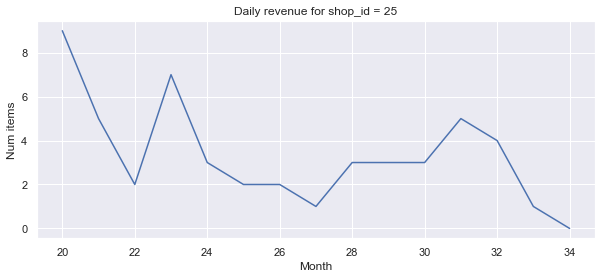

In [252]:
# plt.figure(figsize=(10,4))
# # Plot it
# plt.ylabel('Num items')
# plt.xlabel('Month')
# plt.title("Daily revenue for shop_id = 25")
# plt.plot(all_data_plot['date_block_num'], all_data_plot['item_cnt_month']);
# plt.show()

## 各特徴量の再調整

外れ値を削除 or 残す
EDAの結果を見て不要な特徴量は削除 (特徴量間の相関が高いもの、目的関数との相関がないものを除外)

# Training Models with "all_data"

モデル訓練の前に必ず整理すること！！

- target --> Close <p>
- date_block_num --> train < 1736, test == 1736 (実際は10 holds validation)<p>
    
< Data leakage (re-confirming) >
- price --> unpredictable --> remove <p>

In [593]:
all_data_log['date_block_num'].describe()

count    83328.000000
mean       868.500000
std        501.142958
min          1.000000
25%        434.750000
50%        868.500000
75%       1302.250000
max       1736.000000
Name: date_block_num, dtype: float64

In [592]:
#整理後のtraining data
all_data_log.tail()

,HH,date_block_num,month,Planned_Min_flag,Planned_Max_flag,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_all(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
83323,44,1736.0,12,0.0,0.0,5.569498,0.516615,1.185998,0.974389,4.056114,3.357070,3.248023,3.805594,3.016713,5.152820,4.164002,0.963385,1.903583,-1.912099,-0.631158,1.763438,1.186080,-0.852521,-2.156573,-0.620137,1.233756,1.317352,-0.843218,-1.672878,-0.633052,0.570563,1.353842,-0.85496,-1.917869,-0.631661,-0.374585,1.151051,-0.859206,-1.792305,-0.656124,2.355026,0.891459,-0.855185,-1.757345,-

In [618]:
all_data_log.shape

(83328, 140)

Split all_data set based on time-base

In [594]:
# Organise the order of columns
all_train = all_data_log[all_data_log["date_block_num"] < 1736]
all_valid = all_data_log[all_data_log["date_block_num"] == 1736]

x_train = all_train.drop(['Close'], axis=1)
y_train = all_train.Close
x_valid = all_valid.drop(['Close'], axis=1)
y_valid = all_valid.Close

In [595]:
x_train.tail()

,HH,date_block_num,month,Planned_Min_flag,Planned_Max_flag,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_1,High_Daylag_1,Low_Daylag_1,Average_Daylag_1,Volume(MWh/h)_Daylag_1,Volume(Tick count)_Daylag_1,Temp_Ao_Daylag_1,SunLight(Time)_Ao_Daylag_1,WindSpeed(m/s)_Ao_Daylag_1,WindDirection_Ao_Daylag_1,SunLight(MJ/㎡)_Ao_Daylag_1,Temp_Aki_Daylag_1,SunLight(Time)_Aki_Daylag_1,WindSpeed(m/s)_Aki_Daylag_1,WindDirection_Aki_Daylag_1,SunLight(MJ/㎡)_Aki_Daylag_1,Temp_Mo_Daylag_1,SunLight(Time)_Mo_Daylag_1,WindSpeed(m/s)_Mo_Daylag_1,WindDirection_Mo_Daylag_1,SunLight(MJ/㎡)_Mo_Daylag_1,Temp_Ya_Daylag_1,SunLight(Time)_Ya_Daylag_1,WindSpeed(m/s)_Ya_Daylag_1,WindDirection_Ya_Daylag_1,SunLight(MJ/㎡)_Ya_Daylag_1,Temp_Se_Daylag_1,SunLight(Time)_Se_Daylag_1,WindSpeed(m/s)_Se_Daylag_1,WindDirection_Se_Daylag_1,SunLight(MJ/㎡)_Se_Daylag_1,Temp_Fu_Daylag_1,SunLight(Time)_Fu_Daylag_1,WindSpeed(m/s)_Fu_Daylag_1,WindDirection_Fu_Daylag_1,SunLight(MJ/㎡)_Fu_Daylag_1,Temp_Ni_Daylag_1,SunLight(Time)_Ni_Daylag_1,WindSpeed(m/s)_Ni_Daylag_1,WindDirection_Ni_Daylag_1,SunLight(MJ/㎡)_Ni_Daylag_1,gen_Solar(mkW)_Daylag_1,gen_all(mkW)_Daylag_1,gen_Wind(mkW)_Daylag_1,Hokkaido_Daylag_1,Tohoku_Daylag_1,Tokyo_Daylag_1,Chubu_Daylag_1,Hokuriku_Daylag_1,Kansai_Daylag_1,Chugoku_Daylag_1,Shikoku_Daylag_1,Kyushu_Daylag_1,Okinawa_Daylag_1,Total_Daylag_1,AreaDemand(MWh)_Daylag_1,Water(MWh)_Daylag_1,Thermal(MWh)_Daylag_1,Actual_Solar(MWh)_Daylag_1,Actual_Wind(MWh)_Daylag_1,Geothermal(MWh)_Daylag_1,Biomass(MWh)_Daylag_1,PumpedStorage(MWh)_Daylag_1,Interconnection(MWh)_Daylag_1,Open_Daylag_1_HHlag_1,High_Daylag_1_HHlag_1,Low_Daylag_1_HHlag_1,Average_Daylag_1_HHlag_1,Volume(MWh/h)_Daylag_1_HHlag_1,Volume(Tick count)_Daylag_1_HHlag_1,Temp_Ao_Daylag_1_HHlag_1,SunLight(Time)_Ao_Daylag_1_HHlag_1,WindSpeed(m/s)_Ao_Daylag_1_HHlag_1,WindDirection_Ao_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ao_Daylag_1_HHlag_1,Temp_Aki_Daylag_1_HHlag_1,SunLight(Time)_Aki_Daylag_1_HHlag_1,WindSpeed(m/s)_Aki_Daylag_1_HHlag_1,WindDirection_Aki_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Aki_Daylag_1_HHlag_1,Temp_Mo_Daylag_1_HHlag_1,SunLight(Time)_Mo_Daylag_1_HHlag_1,WindSpeed(m/s)_Mo_Daylag_1_HHlag_1,WindDirection_Mo_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Mo_Daylag_1_HHlag_1,Temp_Ya_Daylag_1_HHlag_1,SunLight(Time)_Ya_Daylag_1_HHlag_1,WindSpeed(m/s)_Ya_Daylag_1_HHlag_1,WindDirection_Ya_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ya_Daylag_1_HHlag_1,Temp_Se_Daylag_1_HHlag_1,SunLight(Time)_Se_Daylag_1_HHlag_1,WindSpeed(m/s)_Se_Daylag_1_HHlag_1,WindDirection_Se_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Se_Daylag_1_HHlag_1,Temp_Fu_Daylag_1_HHlag_1,SunLight(Time)_Fu_Daylag_1_HHlag_1,WindSpeed(m/s)_Fu_Daylag_1_HHlag_1,WindDirection_Fu_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Fu_Daylag_1_HHlag_1,Temp_Ni_Daylag_1_HHlag_1,SunLight(Time)_Ni_Daylag_1_HHlag_1,WindSpeed(m/s)_Ni_Daylag_1_HHlag_1,WindDirection_Ni_Daylag_1_HHlag_1,SunLight(MJ/㎡)_Ni_Daylag_1_HHlag_1,gen_Solar(mkW)_Daylag_1_HHlag_1,gen_all(mkW)_Daylag_1_HHlag_1,gen_Wind(mkW)_Daylag_1_HHlag_1,Hokkaido_Daylag_1_HHlag_1,Tohoku_Daylag_1_HHlag_1,Tokyo_Daylag_1_HHlag_1,Chubu_Daylag_1_HHlag_1,Hokuriku_Daylag_1_HHlag_1,Kansai_Daylag_1_HHlag_1,Chugoku_Daylag_1_HHlag_1,Shikoku_Daylag_1_HHlag_1,Kyushu_Daylag_1_HHlag_1,Okinawa_Daylag_1_HHlag_1,Total_Daylag_1_HHlag_1,AreaDemand(MWh)_Daylag_1_HHlag_1,Water(MWh)_Daylag_1_HHlag_1,Thermal(MWh)_Daylag_1_HHlag_1,Actual_Solar(MWh)_Daylag_1_HHlag_1,Actual_Wind(MWh)_Daylag_1_HHlag_1,Geothermal(MWh)_Daylag_1_HHlag_1,Biomass(MWh)_Daylag_1_HHlag_1,PumpedStorage(MWh)_Daylag_1_HHlag_1,Interconnection(MWh)_Daylag_1_HHlag_1
83275,44,1735.0,12,0.0,0.0,0.498903,1.185348,0.962087,5.137080,4.088559,3.897944,2.921211,2.246867,2.444693,2.978856,1.594187,1.870100,-1.230553,-0.631158,-0.255509,-1.580764,-0.852521,-1.004245,-0.620137,0.274755,-0.437446,-0.843218,-0.883643,-0.633052,0.859296,-0.029989,-0.85496,-1.166931,-0.631661,-0.374585,0.436779,-0.859206,-1.158367,-0.656124,-0.444117,0.104712,-0.855185,-1.230405,-0.640212,-

In [684]:
x_train.shape

(83280, 139)

In [597]:
y_train.head()

0   -0.074514
1   -0.223023
2   -0.223023
3   -0.271172
4   -0.223023
Name: Close, dtype: float64

In [685]:
x_valid.shape

(48, 139)

In [599]:
print(x_valid.isnull().sum())

HH                                       0
date_block_num                           0
month                                    0
Planned_Min_flag                         0
Planned_Max_flag                         0
Sell_volume(kWh)                         0
Buy_volume(kWh)                          0
Total_volume(kWh)                        0
System_price(Yen/kWh)                    0
Price_Tohoku(Yen/kWh)                    0
Price_Tokyo(Yen/kWh)                     0
Open_Daylag_1                            0
High_Daylag_1                            0
Low_Daylag_1                             0
Average_Daylag_1                         0
Volume(MWh/h)_Daylag_1                   0
Volume(Tick count)_Daylag_1              0
Temp_Ao_Daylag_1                         0
SunLight(Time)_Ao_Daylag_1               0
WindSpeed(m/s)_Ao_Daylag_1               0
WindDirection_Ao_Daylag_1                0
SunLight(MJ/㎡)_Ao_Daylag_1               0
Temp_Aki_Daylag_1                        0
SunLight(Ti

# Modelling without any adjustment

Document of Prophet from Facebook
https://peerj.com/preprints/3190/

日本語の解説 (公式ではないが結構細かい)
https://mikiokubo.github.io/analytics/15forecast.html

In [605]:
!pip3 install fbprophet

     |████████████████████████████████| 71kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 39.1MB 234kB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 109kB/s eta 0:00:01
     |████████████████████████████████| 51kB 394kB/s eta 0:00:01
     |████████████████████████████████| 122kB 182kB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 172kB/s eta 0:00:01
     |████████████████████████████████| 737kB 59kB/s eta 0:00:011     |██████████████████████          | 501kB 170kB/s eta 0:00:02
  ERROR: Complete output from command /usr/local/opt/python/bin/python3.7 -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/lh/dxhyckpn2v552fw019vqddx00000gn/T/pip-install-tmt6xjq1/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /priva

  Stored in directory: /Users/kenotsu/Library/Caches/pip/wheels/40/31/ad/edd435075e126fb806bd4dcc6af1c4b5554e53c7562602b51d
  Stored in directory: /Users/kenotsu/Library/Caches/pip/wheels/8d/1a/e7/684cd77a99aac294f976db834fe613b5424f7c4d75ffb0b84d
Successfully built holidays pymeeus
Failed to build fbprophet
ERROR: holidays 0.10.4 has requirement convertdate<=2.2.0, but you'll have convertdate 2.3.0 which is incompatible.
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Running setup.py install for fbprophet ... done


In [600]:
from sklearn.linear_model import LinearRegression
modelLine = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1).fit(x_train, y_train)

In [601]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_jobs = -1, min_samples_leaf = 5, n_estimators=200).fit(x_train, y_train)

In [602]:
from xgboost import XGBRegressor
modelXGB = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, colsample_bytree=0.1).fit(x_train, y_train)

Prophet用にデータを加工する <p>
①日時を残す (YYYYMMDD + Time)にする <p>
②列名を変更 (datetime -->dt, target-->y) <p>
③ date_block_num 1736で分割

In [643]:
all_data["Date"] = all_data["Date"].astype(str)
all_data["Time"] = all_data["Time"].astype(str)

In [653]:
all_data_log ["DateTime"] = pd.to_datetime(all_data["Date"].str.cat( all_data["Time"], sep=" "))

In [721]:
# train dataset for prophet
df_prop = all_data_log.rename(columns={'DateTime': 'ds', 'Close': 'y'})

all_train = df_prop[df_prop["date_block_num"] < 1736]
all_valid = df_prop[df_prop["date_block_num"] == 1736]

y_train = all_train['y']
y_valid = all_valid['y']

In [711]:
from fbprophet import Prophet
modelProp = Prophet().fit(all_train)

periodsパラメータは「カットオフ値」の設定 
--> 設定した数値分行数が増える
-->よくわからないのでとりあえず0

In [713]:
future = modelProp.make_future_dataframe(periods=48, freq= '30min')
future.tail()

,ds
83323,2020-12-31 21:30:00
83324,2020-12-31 22:00:00
83325,2020-12-31 22:30:00
83326,2020-12-31 23:00:00
83327,2020-12-31 23:30:00


In [714]:
forecast = modelProp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
83323,2020-12-31 21:30:00,0.764706,-0.172329,1.695675
83324,2020-12-31 22:00:00,0.679798,-0.235704,1.627158
83325,2020-12-31 22:30:00,0.601978,-0.389200,1.562154
83326,2020-12-31 23:00:00,0.533522,-0.472447,1.522391
83327,2020-12-31 23:30:00,0.477064,-0.518217,1.435262


In [718]:
forecast_train = forecast[forecast.index < 83280]
forecast_valid = forecast[forecast.index >= 83280]

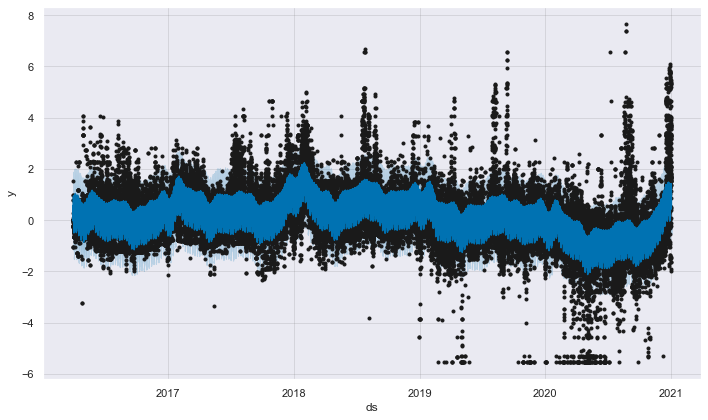

In [726]:
modelProp.plot(forecast);

ARIMAモデル

SVMモデル

[RMSE]

In [722]:
y_preds_model_Line = pd.DataFrame(modelLine.predict(x_train)).round()
y_valid_model_Line = pd.DataFrame(modelLine.predict(x_valid)).round()

y_preds_model_RF = pd.DataFrame(modelRF.predict(x_train)).round()
y_valid_model_RF = pd.DataFrame(modelRF.predict(x_valid)).round()

y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()
y_valid_model_XGB = pd.DataFrame(modelXGB.predict(x_valid)).round()

RMSEは元の数値で算出するほうが良さそう。（ラグを解除する）

In [ ]:
#逆対数変換でPredictionを元の値へ

In [723]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

rmse = sqrt(mean_squared_error(y_train, y_preds_model_Line))
print('Train RMSE_Line: %.3f' % rmse)
rmse = sqrt(mean_squared_error(y_valid, y_valid_model_Line))
print('Valid RMSE_Line: %.3f' % rmse)

rmse = sqrt(mean_squared_error(y_train, y_preds_model_RF))
print('Train RMSE_RF: %.3f' % rmse)
rmse = sqrt(mean_squared_error(y_valid, y_valid_model_Line))
print('Valid RMSE_Line: %.3f' % rmse)

rmse = sqrt(mean_squared_error(y_train, y_preds_model_XGB))
print('Train RMSE_XGB: %.3f' % rmse)
rmse = sqrt(mean_squared_error(y_valid, y_valid_model_XGB))
print('Valid RMSE_XGB: %.3f' % rmse)

rmse = sqrt(mean_squared_error(y_train, forecast_train['yhat']))
print('Train RMSE_Prep: %.3f' % rmse)
rmse = sqrt(mean_squared_error(y_valid, forecast_valid['yhat']))
print('VAlid RMSE_Prep: %.3f' % rmse)

Train RMSE_Line: 0.628
Valid RMSE_Line: 1.046
Train RMSE_RF: 0.421
Valid RMSE_Line: 1.046
Train RMSE_XGB: 0.575
Valid RMSE_XGB: 1.082
Train RMSE_Prep: 0.752
VAlid RMSE_Prep: 2.703


訓練期間が2016/04〜2020/12/30で予測期間が2020/12/31になっているから過学習になっている <p>
-->最終日のターゲットを予測する場合(最終日の売上予測など)はこの期間設定でいいが、時系列分析ではダメ <p>
--> Cross_validationを実施してみる <p>
--> 可視化も

In [ ]:
# # eveluate the model with train & validation data set
# #ここでは train,validでモデル評価する (単純なモデル評価)
# print("Line_Train set score: {:.2f}". format(modelLine.score(x_train, y_train)))
# print("Line_Valid set score: {:.2f}". format(modelLine.score(x_valid, y_valid)))

# print("RF_Train set score: {:.2f}". format(modelRF.score(x_train, y_train)))
# print("RF_Valid set score: {:.2f}". format(modelRF.score(x_valid, y_valid)))

# print("XGB_Train set score: {:.2f}". format(modelXGB.score(x_train, y_train)))
# print("XGB_Valid set score: {:.2f}". format(modelXGB.score(x_valid, y_valid)))

prophetのcross_validationを見てみる<p>

freqが変更可能であれば30minで10回回せるような設定にする<p>
    
    -->total: 83327 dataset
    -->

以下参照<p>
https://mikiokubo.github.io/analytics/15forecast.html

In [729]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(modelProp, initial='1000days', period='90days', horizon= '1day')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2019-01-09 23:30:00 and 2020-12-29 23:30:00


In [730]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-10 00:00:00,-0.043356,-0.843322,0.708179,0.810211,2019-01-09 23:30:00
1,2019-01-10 00:30:00,-0.063294,-0.878235,0.764860,0.972187,2019-01-09 23:30:00
2,2019-01-10 01:00:00,-0.070538,-0.902108,0.739780,0.972187,2019-01-09 23:30:00
3,2019-01-10 01:30:00,-0.068544,-0.889206,0.726399,0.972187,2019-01-09 23:30:00
4,2019-01-10 02:00:00,-0.061875,-0.843549,0.793790,0.122733,2019-01-09 23:30:00


In [731]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,02:30:00,0.686158,0.828347,0.674096,1.140831,0.707435,0.671835
1,03:00:00,0.632678,0.795411,0.651099,1.332861,0.729520,0.684755
2,03:30:00,0.629088,0.793151,0.636416,18.273508,0.826435,0.684755
3,04:00:00,0.595911,0.771953,0.615542,18.554319,0.821419,0.695090
4,04:30:00,0.544453,0.737871,0.582419,18.758778,0.816599,0.759690


In [733]:
df_p.shape

(44, 7)

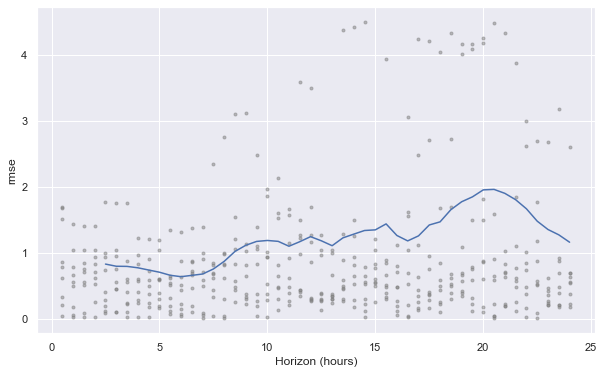

In [732]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [501]:
#正規化
#from sklearn.preprocessing import MinMaxScaler
#mmsc = MinMaxScaler()
# 訓練用のデータを正規化する
#x_train_norm = mmsc.fit_transform(x_train)
# 訓練用データを基準にテストデータも正規化
#x_test_norm = mmsc.transform(x_test)

#print(x_train_norm.max()) #1.0
#print(x_train_norm.min()) #0.0
# test用はtrainを基準に標準化してるので、多少0,1からずれる
#print(x_test_norm.max()) #1.0357142857142858
#print(x_test_norm.min()) #-0.017857142857142877

1.0
0.0
1.0303030303030303
0.0


In [ ]:
# modeling with 3 type
#from sklearn import svm
#modelSVM_ST = svm.LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3).fit(x_train_norm, y_train)
#modelSVM_L2 = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3).fit(x_train, y_train)
#modelSVM_L1 = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=1e-3).fit(x_train, y_train)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#modelCLF = LogisticRegression(penalty='l2', solver='sag', random_state=0).fit(x_train, y_train)

In [ ]:
# eveluate the model with train & validation data set
#ここでは trainとvalidでモデル評価する (単純なモデル評価)

#print("SVM_ST_Train set score: {:.2f}". format(model.score(x_train, y_train)))
#print("SVM_ST_Test set score: {:.2f}". format(model.score(x_test, y_test)))

#print("SVM_L2_Train set score: {:.2f}". format(model.score(x_train, y_train)))
#print("SVM_L2_Test set score: {:.2f}". format(model.score(x_test, y_test)))

#print("SVM_L1_Train set score: {:.2f}". format(model.score(x_train, y_train)))
#print("SVM_L1_Test set score: {:.2f}". format(model.score(x_test, y_test)))

#print("CLF_L1_Train set score: {:.2f}". format(modelCLF.score(x_train, y_train)))
#print("CLF_L1_Test set score: {:.2f}". format(modelCLF.score(x_test, y_test)))

In [ ]:
#y_preds_modelSVM_ST = pd.DataFrame(modelSVM_ST.predict(x_test)).round()
#y_preds_modelSVM_L2 = pd.DataFrame(modelSVM_L2.predict(x_test)).round()
#y_preds_modelSVM_L1 = pd.DataFrame(modelSVM_L1.predict(x_test)).round()
#y_preds_model_CLF = pd.DataFrame(modelCLF.predict(x_test)).round()

In [ ]:
#from sklearn.metrics import mean_squared_error
#from numpy import sqrt
#rmse = sqrt(mean_squared_error(y_train, y_preds_model_RF))
#print('Val RMSE: %.3f' % rmse)

# Validation

- Validation

Type of train/test split is identified and used for validation
Type of public/private split is identified

[cross validation]

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelRF, x_train, y_train)
print("Cross-validation score: {}".format(scores))

Cross-validation score: [0.72327321 0.72321126 0.73138019]


In [136]:
print("Avarage cross-validation score: {:.2f}".format(scores.mean()))

Avarage cross-validation score: 0.73


In [137]:
#分割数を指定するには cｖで指定する
scores = cross_val_score(modelRF, x_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.69485812 0.73060434 0.74611967 0.6776483  0.78210243 0.71693081
 0.78267026 0.76285111 0.6710756  0.75417858]


In [138]:
print("Avarage cross-validation score: {:.2f}".format(scores.mean()))

Avarage cross-validation score: 0.73


[K hold]

In [139]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(modelRF, x_train, y_train, cv=kfold)))

Cross-validation scores:
[0.69277091 0.73363001 0.74469275 0.67503511 0.78185726 0.71863532
 0.78419103 0.7609482  0.67238062 0.75520385]


[LeaveOneOut] (時間かかりすぎ、スキップ)

In [ ]:
# １つ抜き交差検証
#from sklearn.model_selection import LeaveOneOut
#loo = LeaveOneOut()
#scores = cross_val_score(modelRF, x_train, y_train, cv=loo)
#print("Number of cv iterations: ", len(scores))
#print("Mean accuracy: {:.2f}".format(scores.mean()))

[Shuffle]

In [ ]:
# データセットの50%を訓練セット、50%をテストセットにして１０回分割を繰り返す例
#from sklearn.model_selection import ShuffleSplit
#%precision 3
#shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
#scores = cross_val_score(modelRF, x_train, y_train, cv=shuffle_split)
#print("Cross-validation scores\n{}".format(scores))

# グリッドリサーチ

In [140]:
#RandomForestのパラメーターチューニング
from sklearn.model_selection import RandomizedSearchCV
from random import randint
modelRF = RandomForestRegressor(
    n_estimators=200,
  max_depth=3,
  bootstrap=True,
  criterion='mse'
).fit(x_train, y_train)

In [141]:
# predict target
#y_preds_model_Line = pd.DataFrame(modelLine.predict(x_test)).round()
y_preds_model_RF = pd.DataFrame(modelRF.predict(x_train)).round()
#y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()

In [142]:
y_preds_model_RF_valid = pd.DataFrame(modelRF.predict(x_valid)).round()

In [143]:
# Measure the score of RMSE which is the mesure to evaluate on this competition 
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_train, y_preds_model_RF))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 2.504


In [144]:
rmse = sqrt(mean_squared_error(y_valid, y_preds_model_RF_valid))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 2.440


Test XGBoost <p>
And, optimise the hyper parameter based on "RMSE"

In [145]:
#XGBoostのパラメーターチューニング
modelXGB = XGBRegressor(
    colsample_bytree=0.4,
    gamma=0.1,
    max_depth=13,
    min_child_weight=3,
    learning_rate=0.01,
    subsample=1.0,
    n_estimators=200,
    scale_pos_weight=1,
)
modelXGB.fit(
    x_train, y_train, eval_metric="rmse", eval_set=[(x_train, y_train), (x_valid, y_valid)]
)

[0]	validation_0-rmse:9.10465	validation_1-rmse:9.00194
[1]	validation_0-rmse:9.02056	validation_1-rmse:8.92036
[2]	validation_0-rmse:8.93688	validation_1-rmse:8.83777
[3]	validation_0-rmse:8.85406	validation_1-rmse:8.75633
[4]	validation_0-rmse:8.77179	validation_1-rmse:8.67547
[5]	validation_0-rmse:8.69100	validation_1-rmse:8.59707
[6]	validation_0-rmse:8.61039	validation_1-rmse:8.51753
[7]	validation_0-rmse:8.53133	validation_1-rmse:8.44041
[8]	validation_0-rmse:8.45222	validation_1-rmse:8.36227
[9]	validation_0-rmse:8.37402	validation_1-rmse:8.28509
[10]	validation_0-rmse:8.29709	validation_1-rmse:8.20936
[11]	validation_0-rmse:8.22128	validation_1-rmse:8.13453
[12]	validation_0-rmse:8.14559	validation_1-rmse:8.05968
[13]	validation_0-rmse:8.07118	validation_1-rmse:7.98689
[14]	validation_0-rmse:7.99753	validation_1-rmse:7.91504
[15]	validation_0-rmse:7.92420	validation_1-rmse:7.84218
[16]	validation_0-rmse:7.85152	validation_1-rmse:7.77079
[17]	validation_0-rmse:7.77987	validation

[144]	validation_0-rmse:2.80007	validation_1-rmse:3.05136
[145]	validation_0-rmse:2.78149	validation_1-rmse:3.03688
[146]	validation_0-rmse:2.76290	validation_1-rmse:3.02238
[147]	validation_0-rmse:2.74436	validation_1-rmse:3.00802
[148]	validation_0-rmse:2.72660	validation_1-rmse:2.99450
[149]	validation_0-rmse:2.70934	validation_1-rmse:2.98098
[150]	validation_0-rmse:2.69182	validation_1-rmse:2.96760
[151]	validation_0-rmse:2.67417	validation_1-rmse:2.95392
[152]	validation_0-rmse:2.65665	validation_1-rmse:2.94040
[153]	validation_0-rmse:2.64002	validation_1-rmse:2.92746
[154]	validation_0-rmse:2.62379	validation_1-rmse:2.91451
[155]	validation_0-rmse:2.60772	validation_1-rmse:2.90184
[156]	validation_0-rmse:2.59124	validation_1-rmse:2.88876
[157]	validation_0-rmse:2.57494	validation_1-rmse:2.87608
[158]	validation_0-rmse:2.55944	validation_1-rmse:2.86388
[159]	validation_0-rmse:2.54388	validation_1-rmse:2.85198
[160]	validation_0-rmse:2.52904	validation_1-rmse:2.84098
[161]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=13,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
print("XGB_Train set score: {:.2f}". format(modelXGB.score(x_train, y_train)))
print("XGB_Valid set score: {:.2f}". format(modelXGB.score(x_valid, y_valid)))

XGB_Train set score: 0.78
XGB_Valid set score: 0.65


In [147]:
y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()

In [148]:
# Measure the score of RMSE which is the mesure to evaluate on this competition 
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_train, y_preds_model_XGB))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 2.067


In [149]:
y_preds_model_XGB_valid = pd.DataFrame(modelXGB.predict(x_valid)).round()

In [150]:
# Measure the score of RMSE which is the mesure to evaluate on this competition 
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_valid, y_preds_model_XGB_valid))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 2.520


# Visualisation of the model performance 

<やりたいこと>
複数モデルを線形チャートで比較表示させたい。できれば

※
[Explanable easily but conservative]
Linear model
ARIMA, ARIMAX, etc
Prophet



# Making combined price data with all the tradable price

必要なのは、Spot price, 予測後のClose　price

# Calculate trading performance (VaR, Sharp-ratio)

## VaR

## Sharp-ratio